# NYC Yellow Taxi

## Paso 0: Problema de negocio

### Paso 0.1 Contexto

### Paso 0.2: Problema

### Paso 0.3: Objetivos

## Paso 1: Importar Liberias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import shutil
import os


from utils.cleaning_data import remove_outliers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestRegressor

## Paso 2: Cargar los datos

In [51]:
# Define the target directory and the expected dataset files
target_dir = os.path.abspath(os.path.join(os.getcwd(), "../data"))
expected_files = ["yellow_tripdata_2015-01.csv", "yellow_tripdata_2016-01.csv", "yellow_tripdata_2016-02.csv", "yellow_tripdata_2016-03.csv"]  # Replace with actual dataset filenames

# Check if the files already exist in the target directory
if all(os.path.exists(os.path.join(target_dir, file)) for file in expected_files):
    print("Files already exist in the target directory. Skipping download.")
else:
    # Download the dataset
    path = kagglehub.dataset_download("elemento/nyc-yellow-taxi-trip-data")
    print("Path to dataset files:", path)

    # Create the 'data' folder if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)

    # Move all files from download path to target_dir, checking if the file already exists
    for file_name in os.listdir(path):
        src = os.path.join(path, file_name)
        dst = os.path.join(target_dir, file_name)

        # Check if the file already exists in the target directory
        if not os.path.exists(dst):
            shutil.move(src, dst)
            print(f"Moved: {file_name}")
        else:
            print(f"File already exists: {file_name}")

print("Files moved to:", target_dir)

Files already exist in the target directory. Skipping download.
Files moved to: C:\Users\guill\Documents\GitHub\nyc-yellow-taxi\data


In [52]:
df = pd.read_csv(f"../data/yellow_tripdata_2016-03.csv")

In [53]:
df.shape

(12210952, 19)

In [54]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1   
1                  N         -74.005943         40.733166             1   
2                  N         -73.974541         40.675770             1   
3                  N         -73.969650         40.757767             1   
4                  N         -74.177170         40.695053             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          9.0    0.5      0.5        2.05          0.00   
1         11.0    0.5      0.5        3.05          0.00   
2         54.5    0.5      0.5        8.00          0.00   
3         31.5    0.0      0.5        3.78          5.54   
4         98.0    0.0      0.0        0.00         15.50   

   improvement_surcharge  total_amount  
0                    0.3         12.35  
1                    0.3         15.35  
2                    0.3         63.80  
3                    0.3         41.62  
4                    0.3        113.80

In [55]:
df.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
12210947         1  2016-03-31 16:34:36   2016-03-31 16:34:36   
12210948         1  2016-03-26 03:02:32   2016-06-14 18:47:55   
12210949         1  2016-03-20 08:43:59   2016-06-27 15:05:01   
12210950         1  2016-03-20 08:49:47   2016-06-28 19:11:27   
12210951         1  2016-03-20 08:50:24   2016-06-29 15:58:16   

          passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
12210947                1            0.0          0.000000         0.000000   
12210948                1            0.4        -73.977356        40.774471   
12210949                1           20.2          0.000000         0.000000   
12210950                1           15.4        -73.790077        40.647377   
12210951                1           17.5        -73.798485        40.645096   

          RatecodeID store_and_fwd_flag  dropoff_longitude  dropoff_latitude  \
12210947           1                  Y           0.000000          0.000000   
12210948           1                  N         -73.982536         40.772408   
12210949           2                  N         -74.008614         40.710987   
12210950           1                  N         -73.971756         40.578457   
12210951           2                  N         -73.993111         40.725880   

          payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
12210947             2         19.0    1.0      0.5         0.0          0.00   
12210948             1          4.0    1.0      0.5         1.7          0.00   
12210949             1         52.0    0.0      0.5         6.0          5.54   
12210950             1         42.5    1.0      0.5         5.0          0.00   
12210951             1         52.0    0.0      0.5        13.2          0.00   

          improvement_surcharge  total_amount  
12210947                    0.3         20.80  
12210948                    0.3          7.50  
12210949                    0.3         64.34  
12210950                    0.3         49.30  
12210951                    0.3         66.00

## Paso 3: Análisis de datos

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [57]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [58]:
# Select specific numerical columns
selected_columns = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tip_amount', 'total_amount']
numerical_columns = [col for col in selected_columns if col in df.columns]

# Compute summary statistics
statistics = df[numerical_columns].agg(
    ['mean', 'median', 'std', 'var', 'min', 'max', 'skew', 'kurt']
).T.rename(columns={
    "mean": "Mean",
    "median": "Median",
    "std": "Standard Deviation",
    "var": "Variance",
    "min": "Minimum",
    "max": "Maximum",
    "skew": "Skewness",
    "kurt": "Kurtosis"
})

# Display results
print("\nMedidas de tendencia central y dispersión:\n")
statistics


Medidas de tendencia central y dispersión:



Mean  Median  Standard Deviation      Variance  Minimum  \
passenger_count   1.659580    1.00            1.312189  1.721841e+00      0.0   
trip_distance     6.131770    1.70         6156.482645  3.790228e+07      0.0   
fare_amount      12.795078    9.50          134.097923  1.798225e+04   -376.0   
extra             0.345560    0.00            0.456307  2.082160e-01    -58.5   
mta_tax           0.497636    0.50            0.048633  2.365187e-03     -1.0   
tip_amount        1.792582    1.35            2.549124  6.498034e+00    -20.0   
tip_amount        1.792582    1.35            2.549124  6.498034e+00    -20.0   
total_amount     16.045820   11.80          134.357773  1.805201e+04   -376.3   

                     Maximum     Skewness      Kurtosis  
passenger_count         9.00     2.139831  3.483240e+00  
trip_distance    19072628.80  2683.600876  7.853886e+06  
fare_amount        429496.72  2838.928250  8.760766e+06  
extra                  80.00     4.084671  2.164568e+02  
mta_tax                79.30   545.525201  7.878662e+05  
tip_amount            850.00    14.834049  2.164655e+03  
tip_amount            850.00    14.834049  2.164655e+03  
total_amount       429562.25  2823.790195  8.698327e+06

## Paso 4: Gestión de duplicaciones y valores faltantes

### 4.1 Manejo de duplicaciones

In [59]:
duplicates = df.duplicated().sum()

In [60]:
print(f"Número de registros duplicados: {duplicates}")

Número de registros duplicados: 1


In [61]:
df = df.drop_duplicates()

KeyboardInterrupt: 

### 4.2 Manejo de valores faltantes

In [60]:
missing_data = df.isnull().sum()[df.isnull().sum() > 0]

In [61]:
missing_data

Series([], dtype: int64)

## Paso 5:  Reducción de Datos

In [62]:
data = df.drop(columns=["VendorID", "store_and_fwd_flag", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "mta_tax"])

## Paso 6: Ingeniería de Características (Feature Engineering)

### Paso 6.1: Crear Caracteristicas

In [63]:
data.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2016-03-01 00:00:00   2016-03-01 00:07:55                1           2.50   
1  2016-03-01 00:00:00   2016-03-01 00:11:06                1           2.90   
2  2016-03-01 00:00:00   2016-03-01 00:31:06                2          19.98   
3  2016-03-01 00:00:00   2016-03-01 00:00:00                3          10.78   
4  2016-03-01 00:00:00   2016-03-01 00:00:00                5          30.43   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  \
0             1          9.0    0.5        2.05          0.00   
1             1         11.0    0.5        3.05          0.00   
2             1         54.5    0.5        8.00          0.00   
3             1         31.5    0.0        3.78          5.54   
4             1         98.0    0.0        0.00         15.50   

   improvement_surcharge  total_amount  
0                    0.3         12.35  
1                    0.3         15.35  
2                    0.3         63.80  
3                    0.3         41.62  
4                    0.3        113.80

In [64]:
# Ensure the columns are in datetime format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# Calculate trip duration
data['trip_duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

# Optional: Get duration in minutes (or seconds, etc.)
data['trip_duration_minutes'] = data['trip_duration'].dt.total_seconds() / 60

In [67]:
data.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0           2016-03-01   2016-03-01 00:07:55                1           2.50   
1           2016-03-01   2016-03-01 00:11:06                1           2.90   
2           2016-03-01   2016-03-01 00:31:06                2          19.98   
3           2016-03-01   2016-03-01 00:00:00                3          10.78   
4           2016-03-01   2016-03-01 00:00:00                5          30.43   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  \
0             1          9.0    0.5        2.05          0.00   
1             1         11.0    0.5        3.05          0.00   
2             1         54.5    0.5        8.00          0.00   
3             1         31.5    0.0        3.78          5.54   
4             1         98.0    0.0        0.00         15.50   

   improvement_surcharge  total_amount   trip_duration  trip_duration_minutes  
0                    0.3         12.35 0 days 00:07:55               7.916667  
1                    0.3         15.35 0 days 00:11:06              11.100000  
2                    0.3         63.80 0 days 00:31:06              31.100000  
3                    0.3         41.62 0 days 00:00:00               0.000000  
4                    0.3        113.80 0 days 00:00:00               0.000000

In [69]:
data.loc[data['trip_duration_minutes'] <= 0, 'trip_duration_minutes'] = 0
data[0 >= data['trip_duration_minutes']]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3         2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2016-03-01 00:00:00   2016-03-01 00:00:00                5   
5         2016-03-01 00:00:00   2016-03-01 00:00:00                5   
6         2016-03-01 00:00:00   2016-03-01 00:00:00                6   
20904     2016-03-10 08:57:08   2016-03-10 08:57:08                1   
...                       ...                   ...              ...   
12205244  2016-03-31 23:42:28   2016-03-31 23:42:28                1   
12207125  2016-03-31 23:48:00   2016-03-31 23:48:00                1   
12208277  2016-03-31 23:51:25   2016-03-31 23:51:25                1   
12209016  2016-03-31 23:53:41   2016-03-31 23:53:41                1   
12210431  2016-03-31 23:58:15   2016-03-31 23:58:15                1   

          trip_distance  payment_type  fare_amount  extra  tip_amount  \
3                 10.78             1         31.5    0.0        3.78   
4                 30.43             1         98.0    0.0        0.00   
5                  5.92             1         23.5    1.0        5.06   
6                  5.72             2         23.0    0.5        0.00   
20904              0.01             2          2.5    0.0        0.00   
...                 ...           ...          ...    ...         ...   
12205244           0.00             2          7.0    0.5        0.00   
12207125           0.00             2          2.5    0.5        0.00   
12208277           0.00             2          8.0    0.5        0.00   
12209016           0.00             2         19.0    0.5        0.00   
12210431           1.10             2         23.3    0.0        0.00   

          tolls_amount  improvement_surcharge  total_amount trip_duration  \
3                 5.54                    0.3         41.62        0 days   
4                15.50                    0.3        113.80        0 days   
5                 0.00                    0.3         30.36        0 days   
6                 0.00                    0.3         24.30        0 days   
20904             0.00                    0.3          3.30        0 days   
...                ...                    ...           ...           ...   
12205244          0.00                    0.3          8.30        0 days   
12207125          0.00                    0.3          3.80        0 days   
12208277          0.00                    0.3          9.30        0 days   
12209016          0.00                    0.3         20.30        0 days   
12210431          0.00                    0.3         23.60        0 days   

          trip_duration_minutes  
3                           0.0  
4                           0.0  
5                           0.0  
6                           0.0  
20904                       0.0  
...                         ...  
12205244                    0.0  
12207125                    0.0  
12208277                    0.0  
12209016                    0.0  
12210431                    0.0  

[12549 rows x 13 columns]

In [46]:
len(data[0 >= data['trip_duration_minutes']]) / len(data)

0.0010273324501878936

In [56]:
# Create 5 quantile-based bins with clear labels
labels = ['very short', 'short', 'medium', 'long', 'very long']
data['trip_distance_quantile'] = pd.qcut(data['trip_distance'], q=5, labels=labels)

# Check how trips are distributed across bins
print(data['trip_distance_quantile'].value_counts().sort_index())

trip_distance_quantile
very short    2624346
short         2413355
medium        2319142
long          2427648
very long     2421879
Name: count, dtype: int64


In [5]:
# Define the bin edges
bins = [0, 1, 2, 3, 4, 5, np.inf]
labels = ['less than 1 min', '1-2 min', '2-3 min', '3-4 min', '4-5 min', 'more than 5 min']

# Apply the binning
data['trip_time_interval'] = pd.cut(data['trip_time'], bins=bins, labels=labels, right=False)

# Optional: check distribution
print(data['trip_time_interval'].value_counts().sort_index())

KeyError: 'trip_time'

In [98]:
# Define the bin edges
bins = [0, 5, 10, 15, 20, 25, np.inf]
labels = ['less than 5 min', '5-10 min', '10-15 min', '15-20 min', '20-25 min', 'more than 25 min']

# Apply the binning
data['trip_duration_minutes_interval'] = pd.cut(data['trip_duration_minutes'], bins=bins, labels=labels, right=False)

# Optional: check distribution
print(data['trip_duration_minutes'].value_counts().sort_index())

trip_duration_minutes
0.016667          692
0.033333         3498
0.050000         5453
0.066667         4434
0.083333         3578
                 ... 
50680.916667        1
116145.383333       1
142941.033333       1
144621.666667       1
145867.866667       1
Name: count, Length: 13235, dtype: int64


In [139]:
data['total_amount_log'] = np.log1p(data['total_amount'])

## Paso 7: Limpieza y Manipulación de Datos

In [73]:
data.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0           2016-03-01   2016-03-01 00:07:55                1           2.50   
1           2016-03-01   2016-03-01 00:11:06                1           2.90   
2           2016-03-01   2016-03-01 00:31:06                2          19.98   
3           2016-03-01   2016-03-01 00:00:00                3          10.78   
4           2016-03-01   2016-03-01 00:00:00                5          30.43   

   payment_type  fare_amount  extra  tip_amount  tolls_amount  \
0             1          9.0    0.5        2.05          0.00   
1             1         11.0    0.5        3.05          0.00   
2             1         54.5    0.5        8.00          0.00   
3             1         31.5    0.0        3.78          5.54   
4             1         98.0    0.0        0.00         15.50   

   improvement_surcharge  total_amount   trip_duration  trip_duration_minutes  \
0                    0.3         12.35 0 days 00:07:55               7.916667   
1                    0.3         15.35 0 days 00:11:06              11.100000   
2                    0.3         63.80 0 days 00:31:06              31.100000   
3                    0.3         41.62 0 days 00:00:00               0.000000   
4                    0.3        113.80 0 days 00:00:00               0.000000   

  trip_distance_quantile trip_distance_interval  
0             (2.1, 3.8]                    2-3  
1             (2.1, 3.8]                    2-3  
2      (3.8, 19072628.8]                     >5  
3      (3.8, 19072628.8]                     >5  
4      (3.8, 19072628.8]                     >5

In [74]:
# Step 1: Replace 0s with NaNs in trip_duration_minutes
data['trip_duration_minutes'] = data['trip_duration_minutes'].replace(0, np.nan)

# Step 2: Select columns to impute on (must be numerical)
features = ['trip_duration_minutes', 'trip_distance']
impute_data = data[features]

# Step 3: Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(impute_data)

# Step 4: Assign imputed values back to the DataFrame
data['trip_duration_minutes'] = imputed_array[:, 0]

In [75]:
data = data.drop("tpep_pickup_datetime", axis=1)

In [76]:
data = data.drop("tpep_dropoff_datetime", axis=1)

In [77]:
data = data.drop("trip_duration", axis=1)

In [78]:
data = data[data['total_amount'] >= 0]

In [10]:
data

passenger_count  trip_distance  payment_type  fare_amount  extra  \
0                       1           2.50             1          9.0    0.5   
1                       1           2.90             1         11.0    0.5   
2                       2          19.98             1         54.5    0.5   
3                       3          10.78             1         31.5    0.0   
4                       5          30.43             1         98.0    0.0   
...                   ...            ...           ...          ...    ...   
12206365                1          12.10             1         34.5    0.0   
12206366                1           0.40             1          4.0    1.0   
12206367                1          20.20             1         52.0    0.0   
12206368                1          15.40             1         42.5    1.0   
12206369                1          17.50             1         52.0    0.0   

          tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0               2.05          0.00                    0.3         12.35   
1               3.05          0.00                    0.3         15.35   
2               8.00          0.00                    0.3         63.80   
3               3.78          5.54                    0.3         41.62   
4               0.00         15.50                    0.3        113.80   
...              ...           ...                    ...           ...   
12206365        5.00          0.00                    0.3         40.30   
12206366        1.70          0.00                    0.3          7.50   
12206367        6.00          5.54                    0.3         64.34   
12206368        5.00          0.00                    0.3         49.30   
12206369       13.20          0.00                    0.3         66.00   

          trip_duration_minutes trip_distance_quantile trip_distance_interval  \
0                      7.916667             (2.1, 3.8]                2-3 min   
1                     11.100000             (2.1, 3.8]                2-3 min   
2                     31.100000      (3.8, 19072628.8]        more than 5 min   
3                     30.813333      (3.8, 19072628.8]        more than 5 min   
4                     79.723333      (3.8, 19072628.8]        more than 5 min   
...                         ...                    ...                    ...   
12206365           41878.733333      (3.8, 19072628.8]        more than 5 min   
12206366          116145.383333          (-0.001, 0.9]        less than 1 min   
12206367          142941.033333      (3.8, 19072628.8]        more than 5 min   
12206368          144621.666667      (3.8, 19072628.8]        more than 5 min   
12206369          145867.866667      (3.8, 19072628.8]        more than 5 min   

          total_amount_log  
0                 2.591516  
1                 2.794228  
2                 4.171306  
3                 3.752324  
4                 4.743191  
...                    ...  
12206365          3.720862  
12206366          2.140066  
12206367          4.179604  
12206368          3.918005  
12206369          4.204693  

[12206370 rows x 13 columns]

In [100]:
data.to_csv('nyc_yellow_texi_data.csv', index=False)

In [107]:
data_cleaned = data.copy()

In [108]:
valid_extras = [0.0, 0.5, 1.0, 1.5]
data_cleaned = data_cleaned[data_cleaned['extra'].isin(valid_extras)]

In [109]:
data_cleaned = remove_outliers(data_cleaned, ["total_amount", "trip_distance", "tip_amount", "trip_duration_minutes"])

In [227]:
data_cleaned = data_cleaned[data_cleaned["total_amount"] > 0]

In [201]:
data_cleaned = data_cleaned[data_cleaned["trip_distance"] > 0]

In [203]:
data_cleaned = data_cleaned[data_cleaned["trip_duration_minutes"] > 0]

In [101]:
data_cleaned.to_csv('nyc_yellow_texi_data_cleaned.csv', index=False)

In [102]:
data = pd.read_csv('nyc_yellow_texi_data.csv')

In [103]:
data_cleaned = pd.read_csv('nyc_yellow_texi_data_cleaned.csv')

In [64]:
len(data_cleaned)

10080909

## Paso 8: Agrupar las variables según el tipo

### Paso 8.1: Guardar la variable objetivo

In [104]:
target_var_num = "total_amount"

In [105]:
target_var_num_log = "total_amount_log"

In [106]:
target_var_cat = ""

### Paso 8.2: Guardar las variables categorias

In [107]:
vars_cat = [var for var in data.columns if (data[var].dtype == "O"
            or var == "payment_type")
            and var != target_var_cat]

In [108]:
vars_cat

['payment_type',
 'trip_distance_quantile',
 'trip_distance_interval',
 'trip_duration_minutes_interval']

### Paso 8.3 Guardar las variables númericas

In [109]:
vars_nums = [var for var in data.columns if data[var].dtype != "O" and var != target_var_num  and var not in vars_cat]

In [110]:
vars_nums

['passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'trip_duration_minutes',
 'total_amount_log']

### Paso 8.4 Variables discretas

In [111]:
# Initialize lists
vars_disc = []
vars_con = []

# Loop through each numeric variable
for col in vars_nums:
    if pd.api.types.is_integer_dtype(data[col]):
        vars_disc.append(col)
    else:
        vars_con.append(col)

In [112]:
vars_disc

['passenger_count']

In [113]:
vars_con

['trip_distance',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'trip_duration_minutes',
 'total_amount_log']

## Paso 9: Análisis Univariado

### Paso 9.1: Análisis Univeriado de Variables Categorías

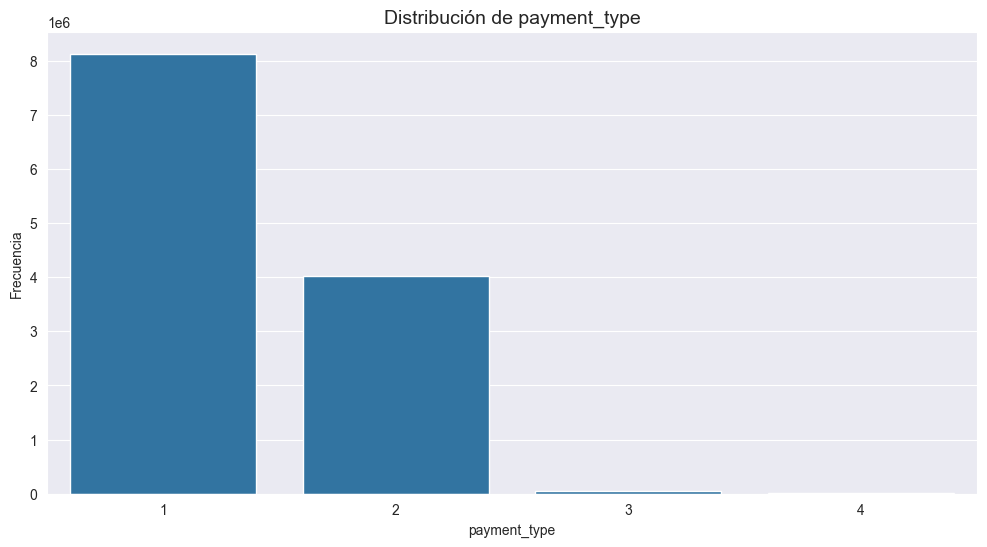

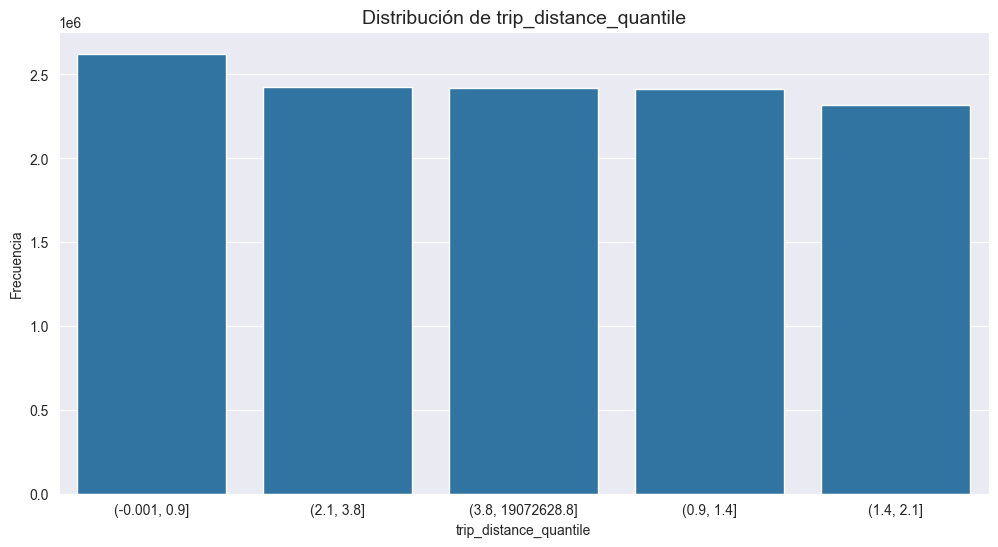

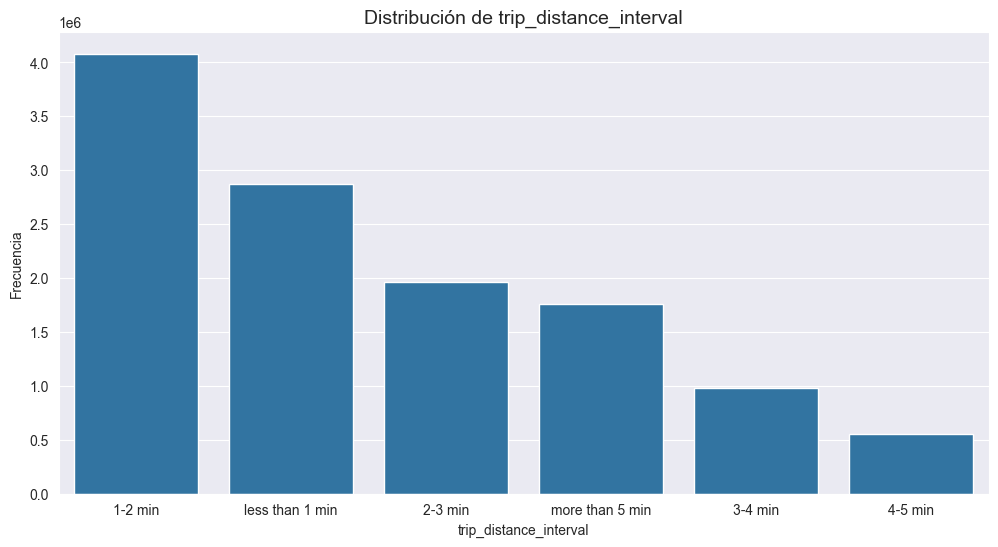

In [26]:
for var in vars_cat:
    order = data[var].value_counts().index
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=var, order=order)
    plt.title(f'Distribución de {var}', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

### Paso 9.2: Análisis Univeriado de Variables Númericas

#### Paso 9.2.1: Análisis Univeriado de Variables Discretas

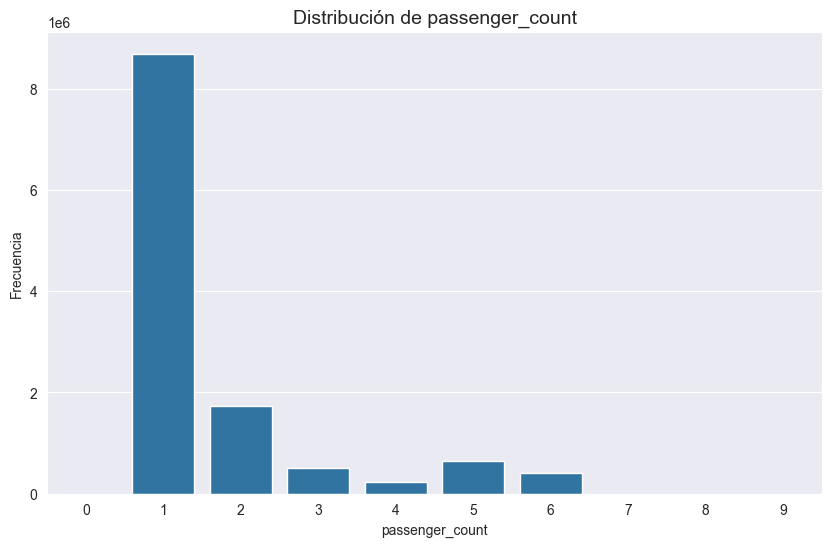

In [27]:
for var in vars_disc:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=var)
    plt.title(f'Distribución de {var}', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

#### Paso 9.2.2: Análisis Univeriado de Variables Continuas

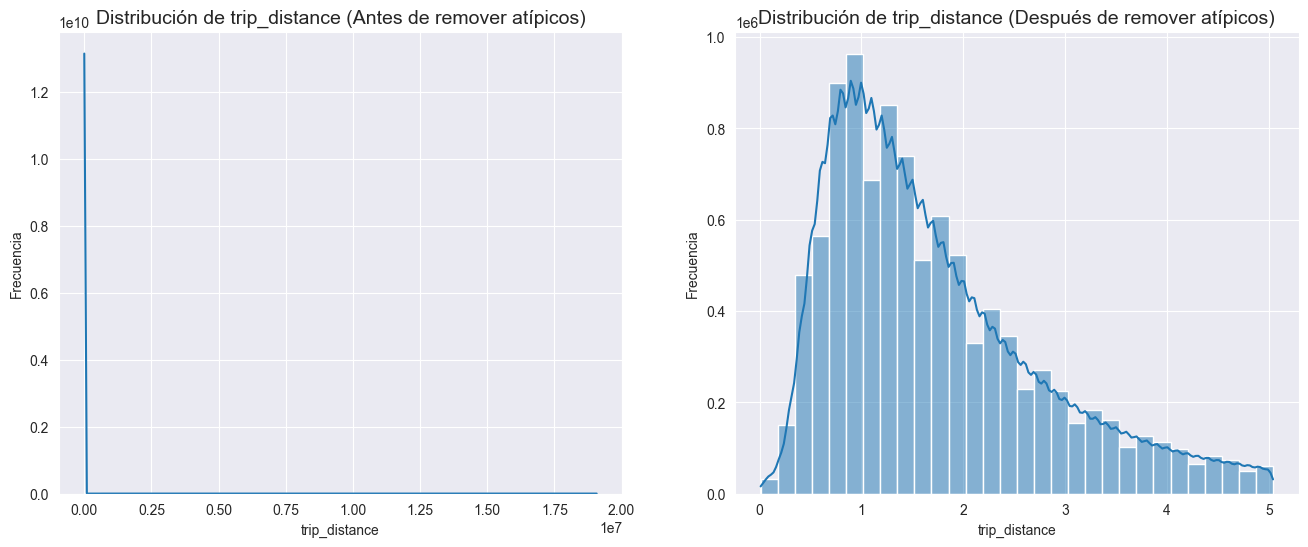

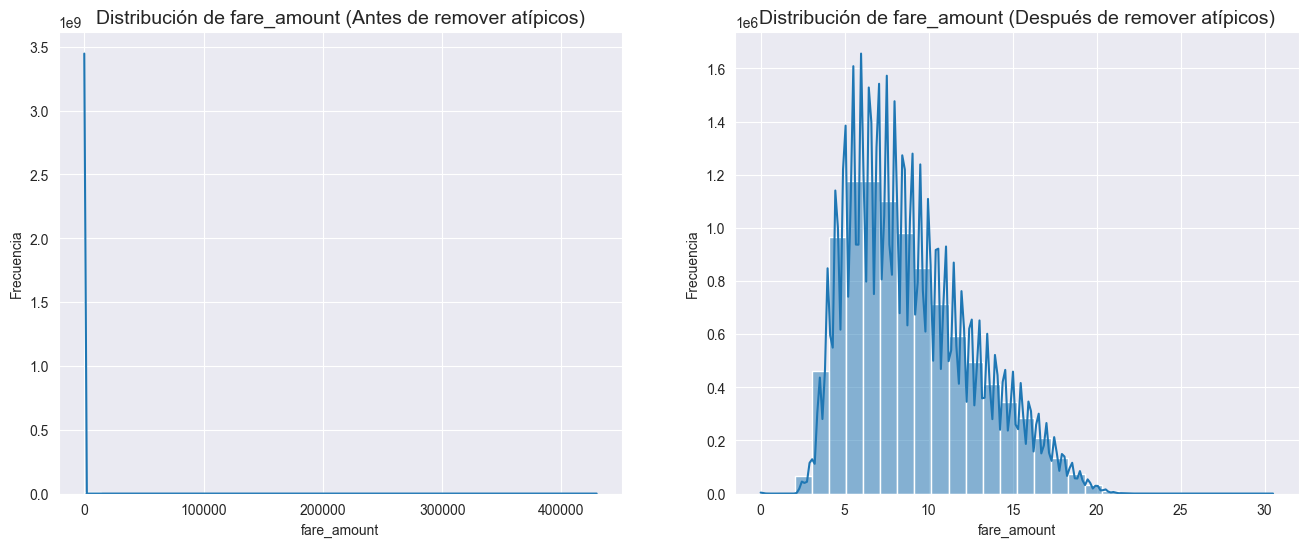

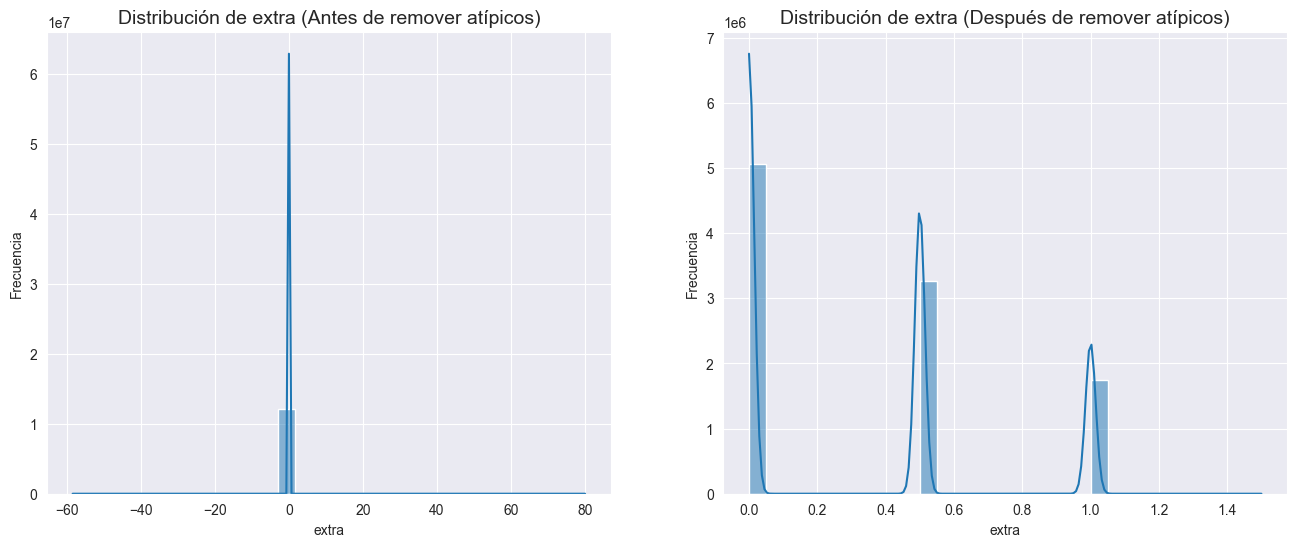

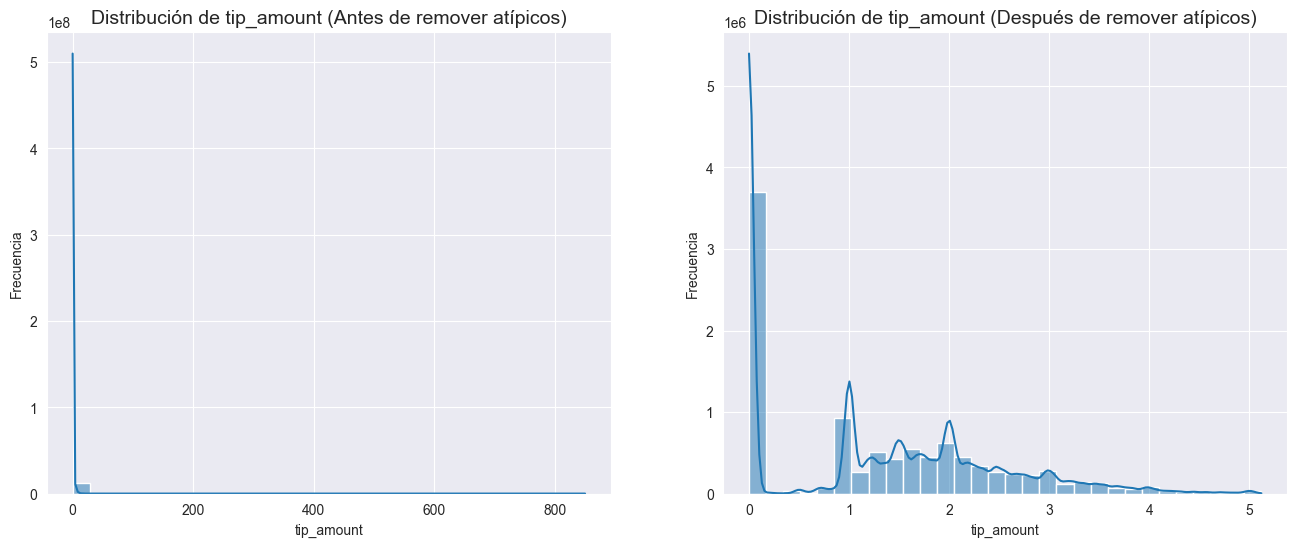

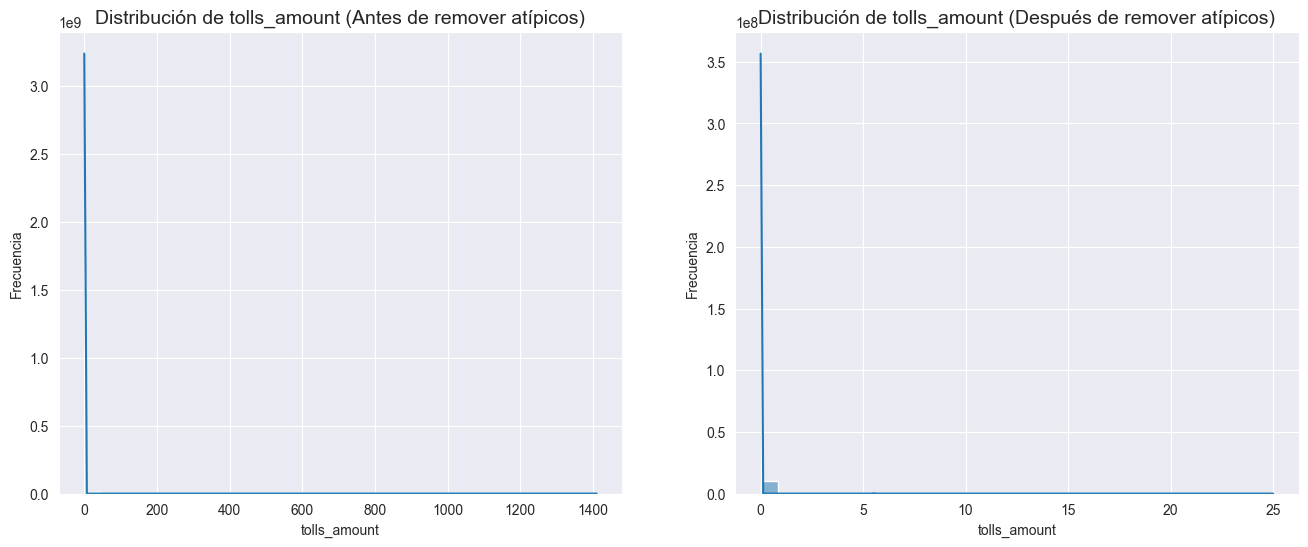

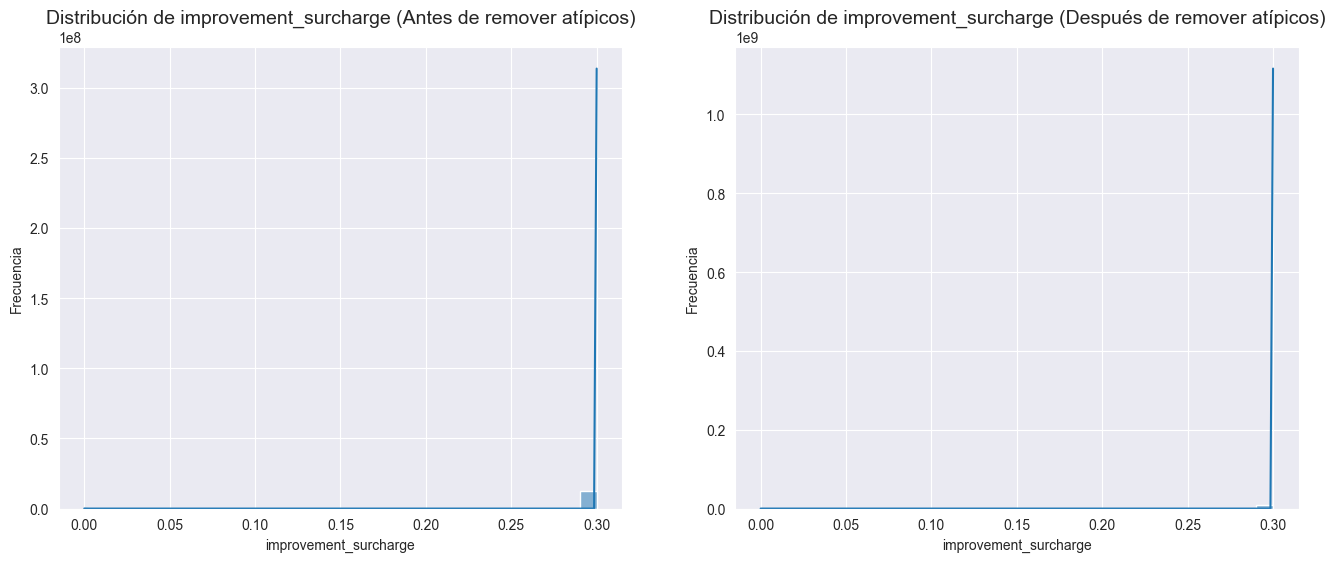

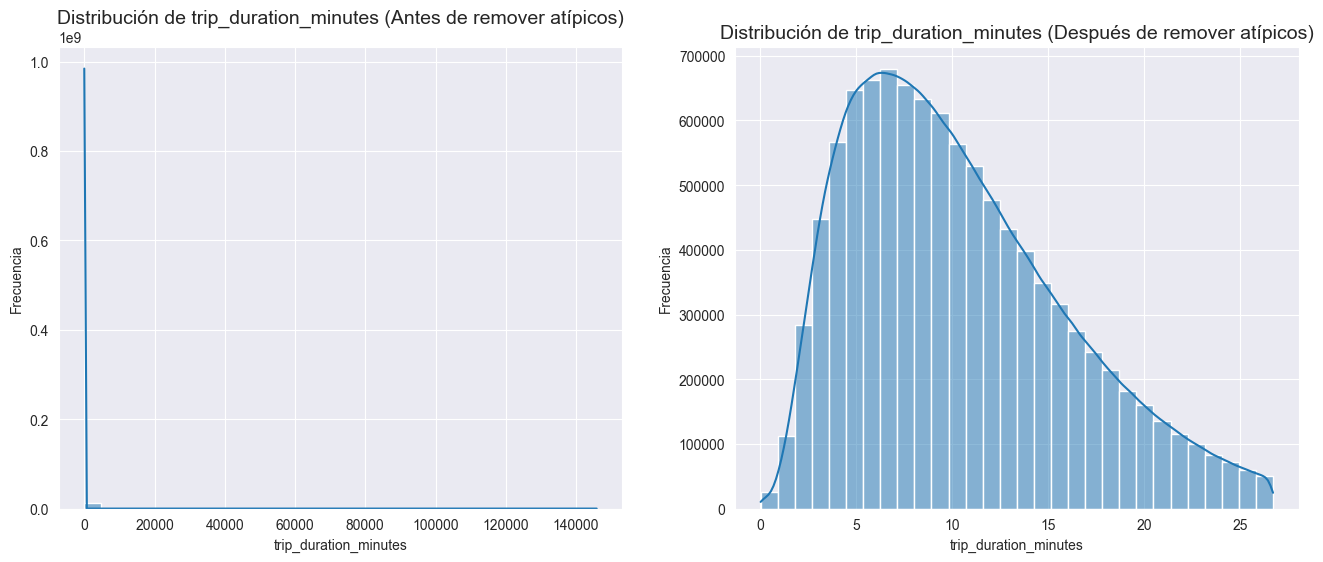

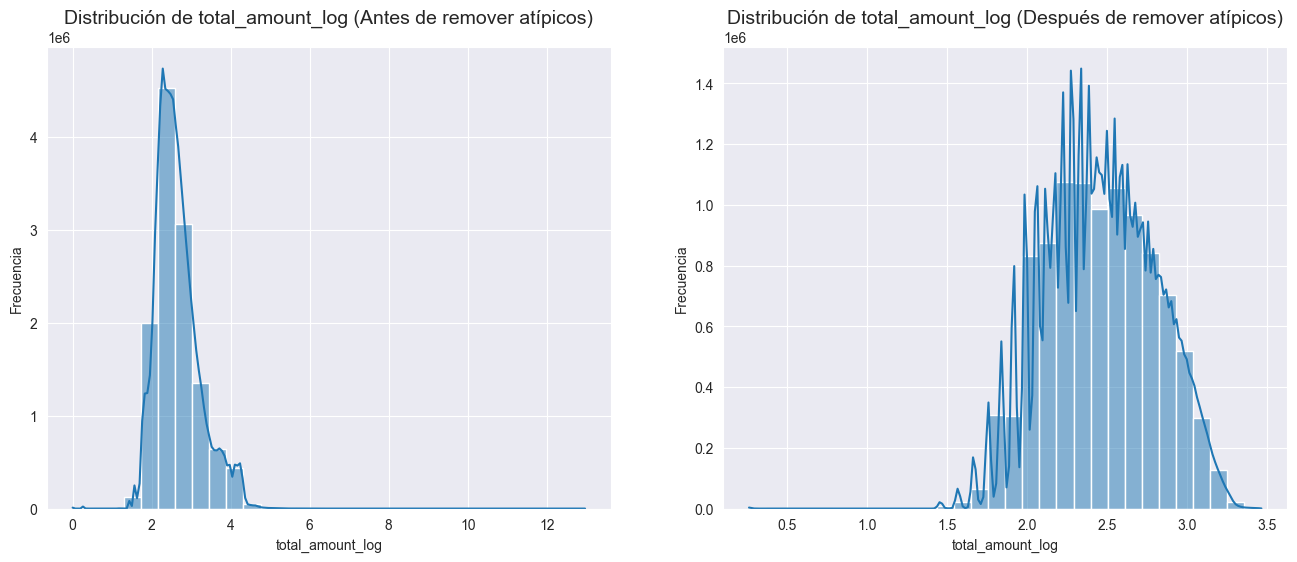

In [28]:
for var in vars_con:
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Distribución de {var} (Antes de remover atípicos)', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

    plt.subplot(1, 2, 2)
    sns.histplot(data_cleaned[var], kde=True, bins=30)
    plt.title(f'Distribución de {var} (Después de remover atípicos)', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

### Paso 9.3: Análisis Univeriado del Variable Objetivo

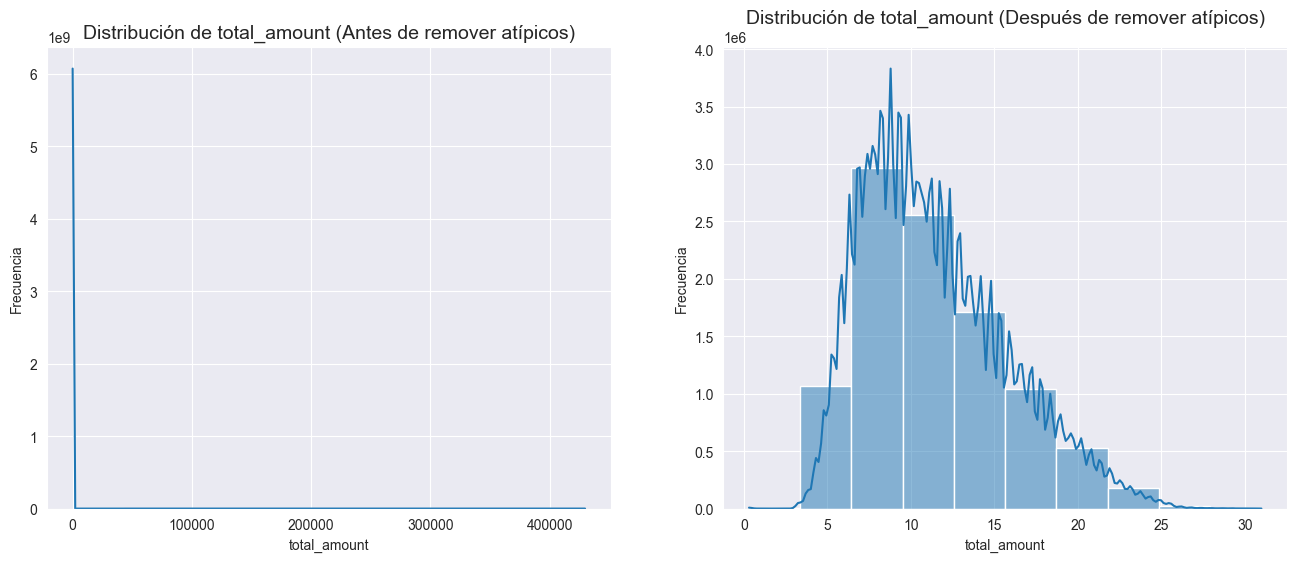

In [29]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[target_var_num], kde=True, bins=10)
plt.title(f'Distribución de {target_var_num} (Antes de remover atípicos)', fontsize=14)
plt.xlabel(target_var_num)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(data_cleaned[target_var_num], kde=True, bins=10)
plt.title(f'Distribución de {target_var_num} (Después de remover atípicos)', fontsize=14)
plt.xlabel(target_var_num)
plt.ylabel('Frecuencia')
plt.show()

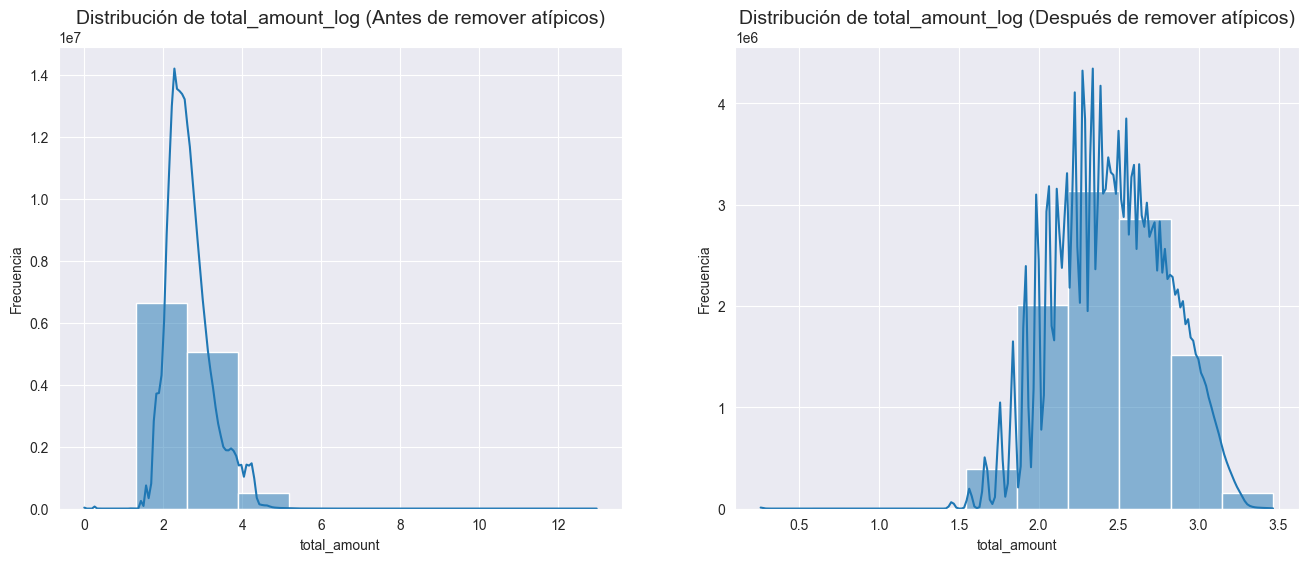

In [30]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[target_var_num_log], kde=True, bins=10)
plt.title(f'Distribución de {target_var_num_log} (Antes de remover atípicos)', fontsize=14)
plt.xlabel(target_var_num)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(data_cleaned[target_var_num_log], kde=True, bins=10)
plt.title(f'Distribución de {target_var_num_log} (Después de remover atípicos)', fontsize=14)
plt.xlabel(target_var_num)
plt.ylabel('Frecuencia')
plt.show()

## Paso 10: Análisis Bivariado

### Paso 10.1: Análisis Bivariado: Relación con el Precio

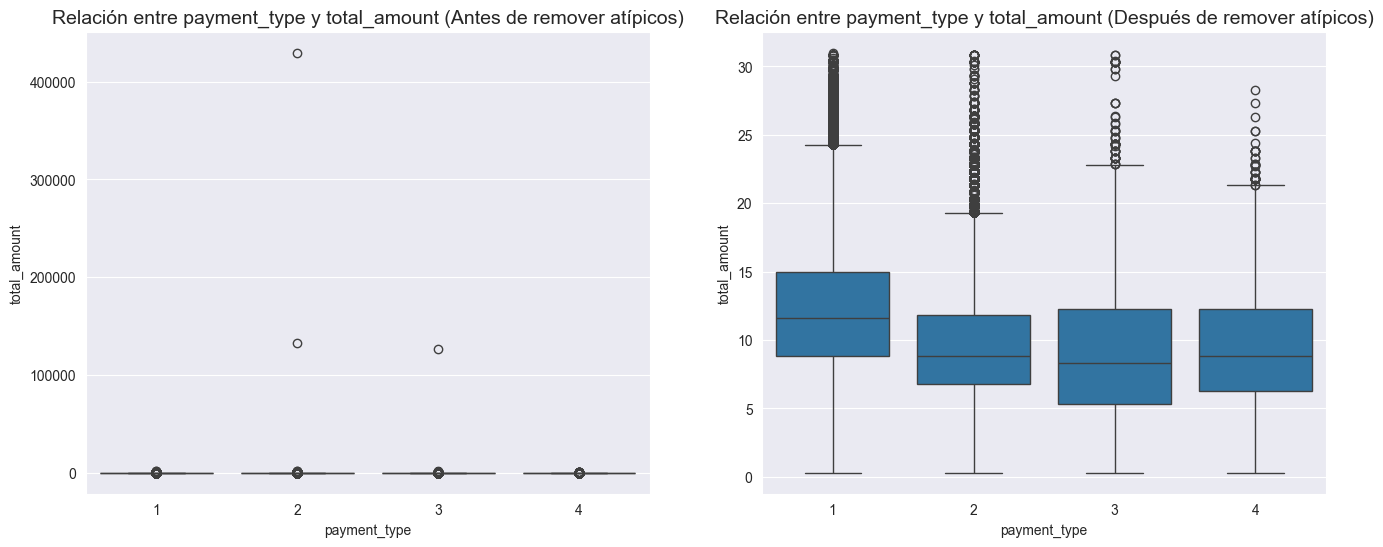

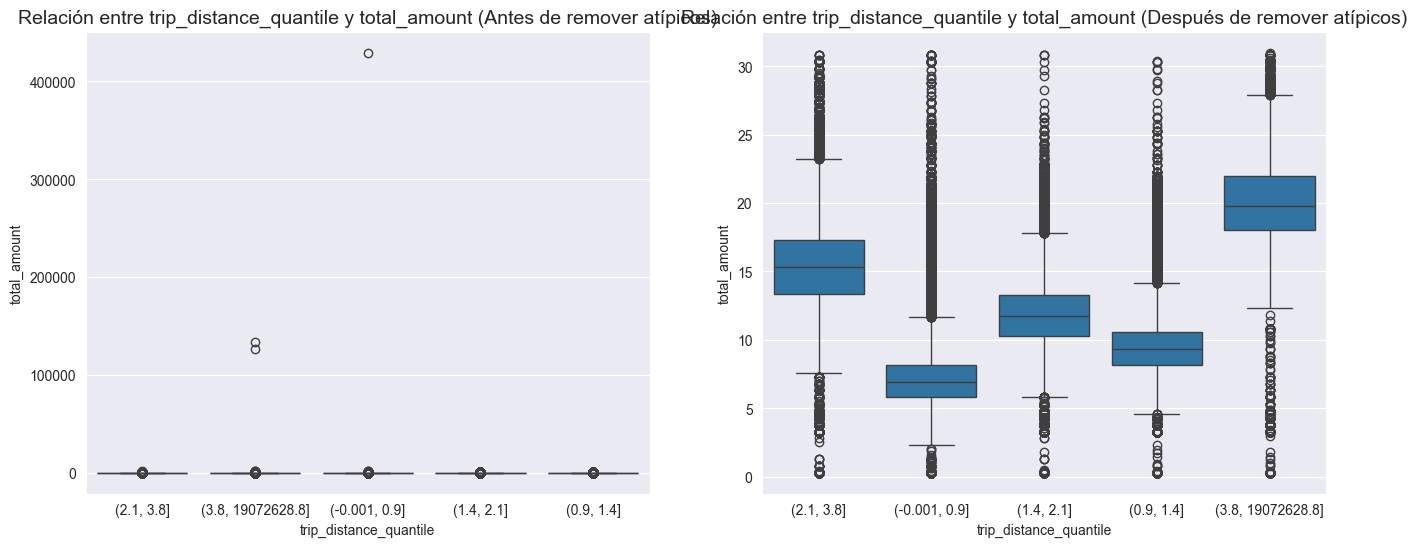

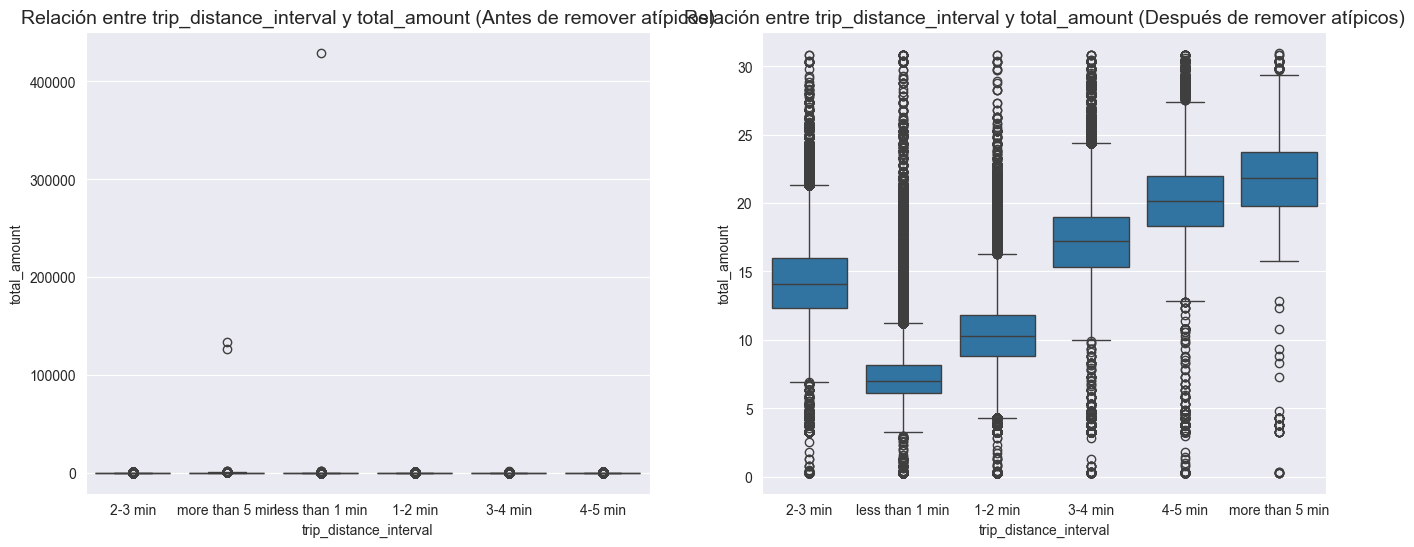

In [31]:
for col in vars_cat:
    plt.figure(figsize=(16, 6))  # Standard size for other categories
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, x=col, y=target_var_num)  # Horizontal plot
    plt.title(f'Relación entre {col} y {target_var_num} (Antes de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)

    plt.subplot(1, 2, 2)
    sns.boxplot(data=data_cleaned, x=col, y=target_var_num)  # Horizontal plot
    plt.title(f'Relación entre {col} y {target_var_num} (Después de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)
    plt.show()

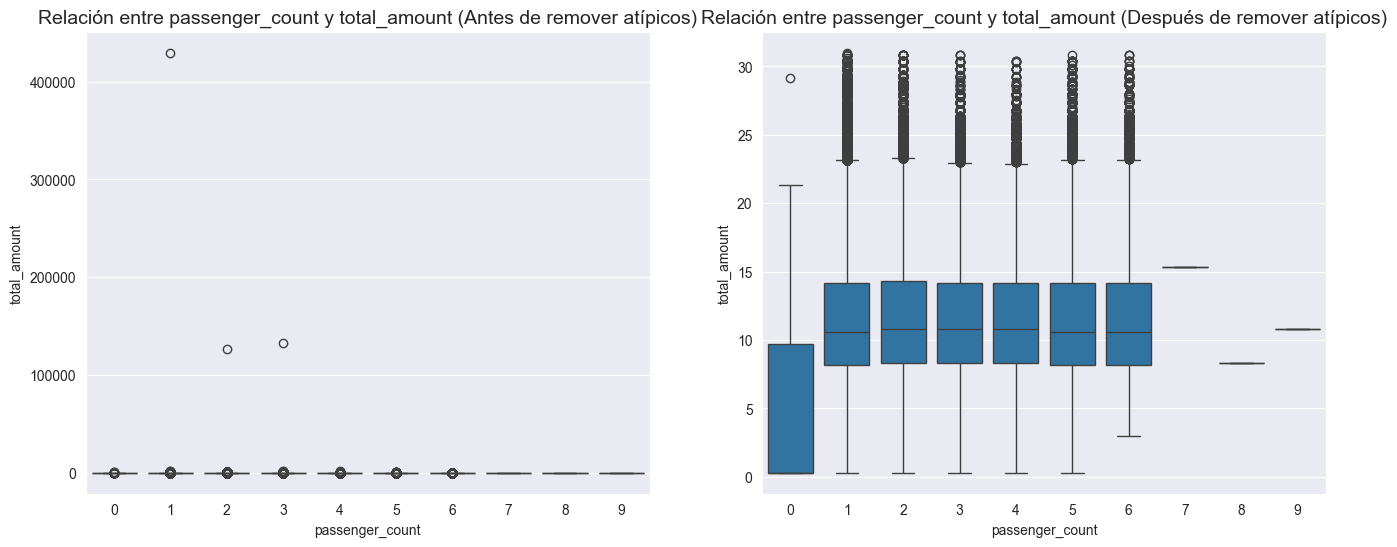

In [32]:
for col in vars_disc:
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, x=col, y=target_var_num)
    plt.title(f'Relación entre {col} y {target_var_num} (Antes de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)

    plt.subplot(1, 2, 2)
    sns.boxplot(data=data_cleaned, x=col, y=target_var_num)
    plt.title(f'Relación entre {col} y {target_var_num} (Después de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)
    plt.show()

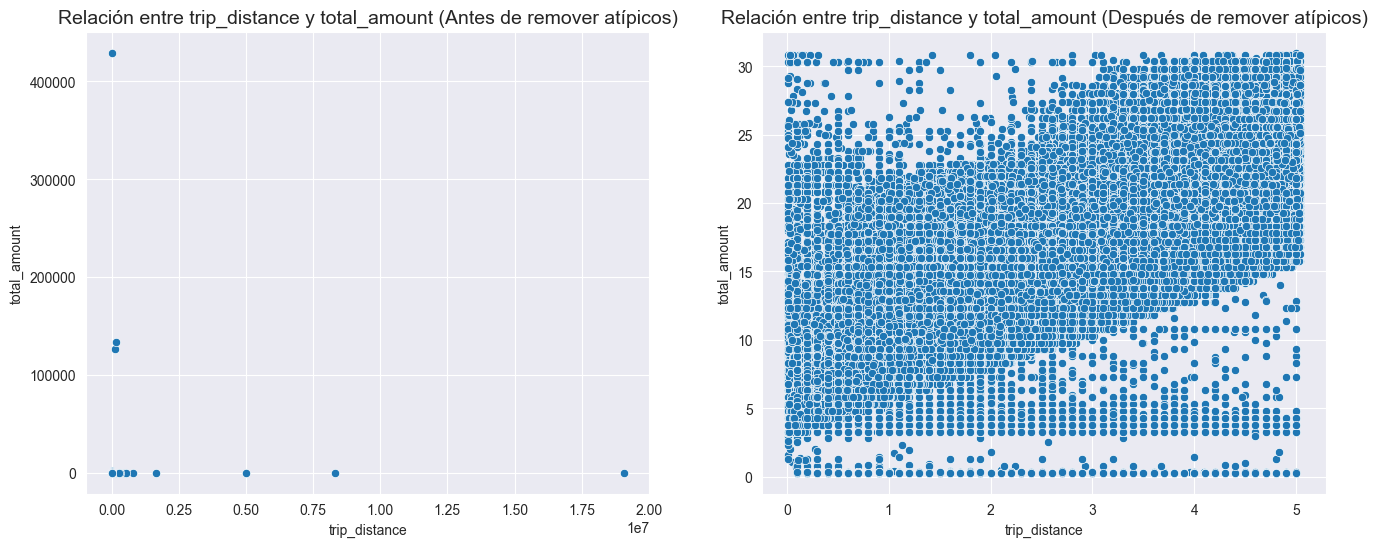

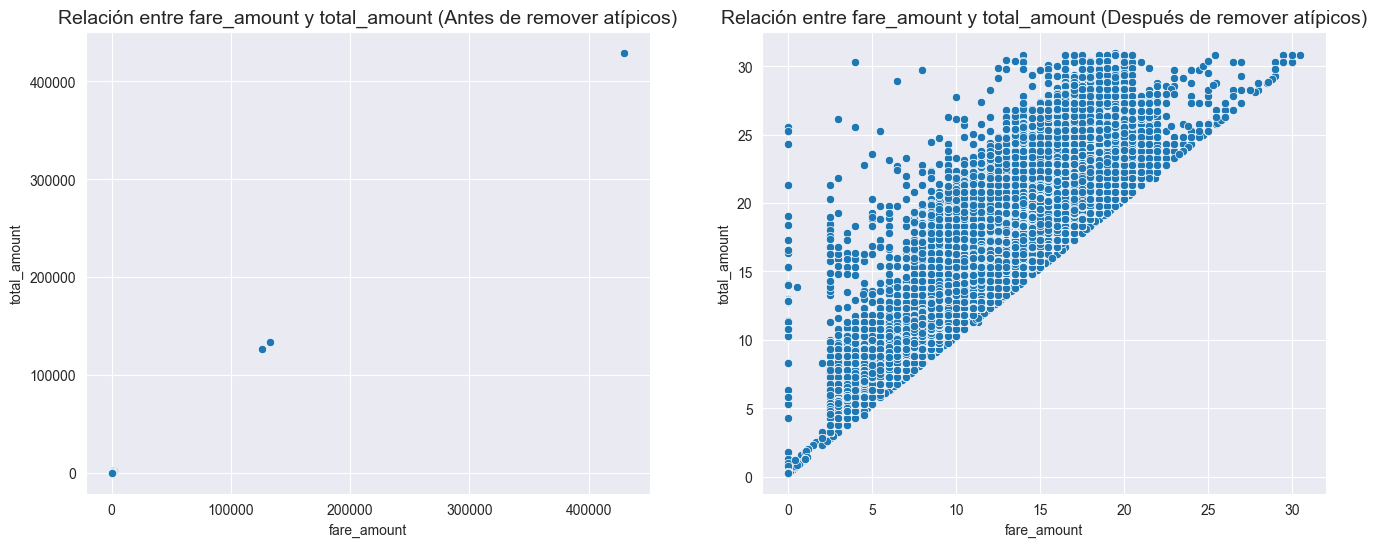

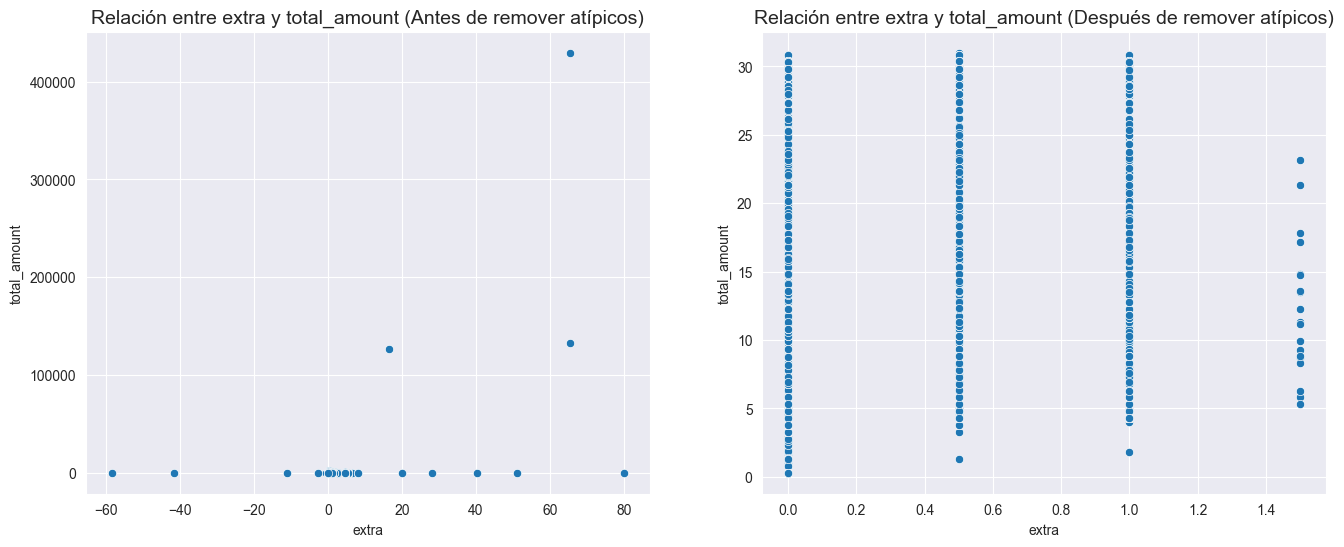

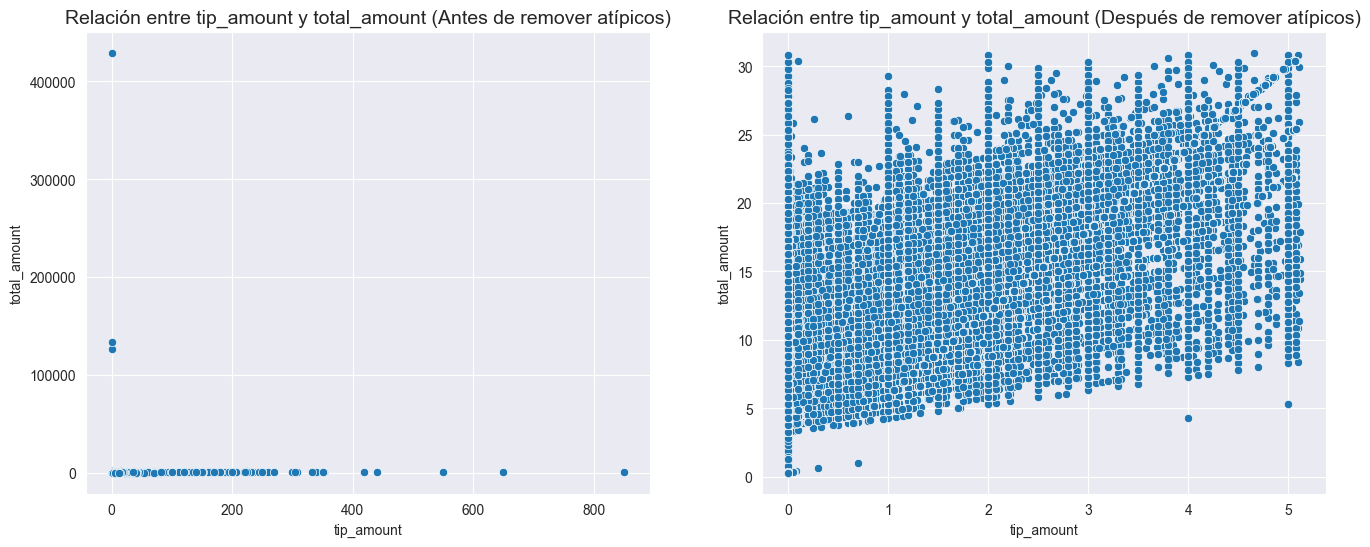

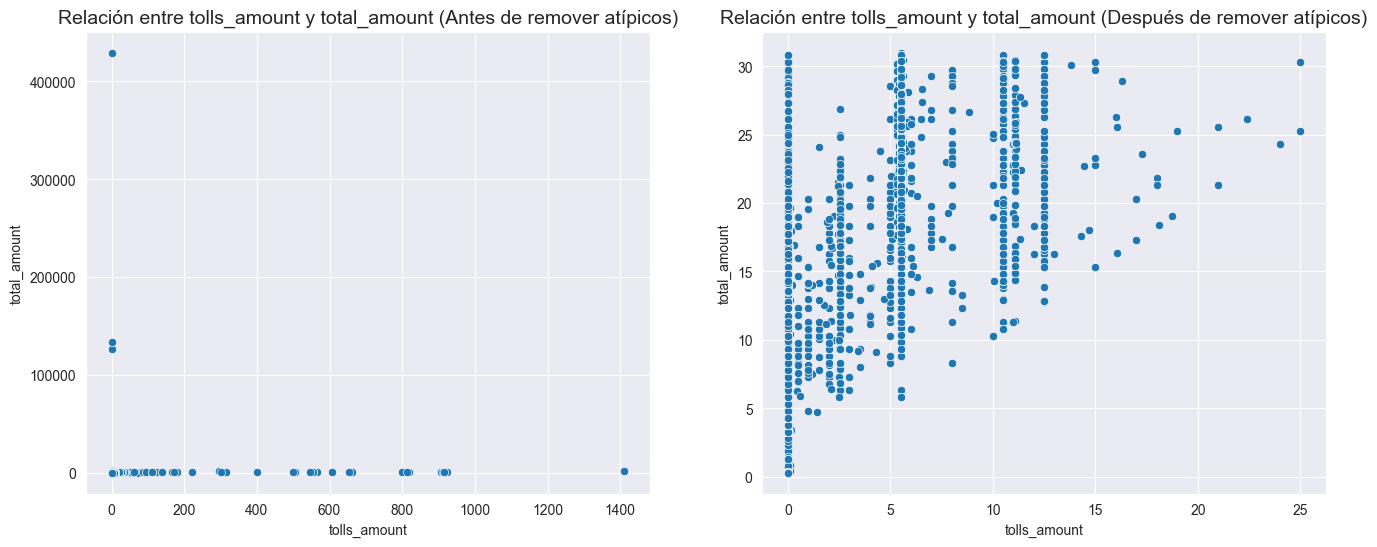

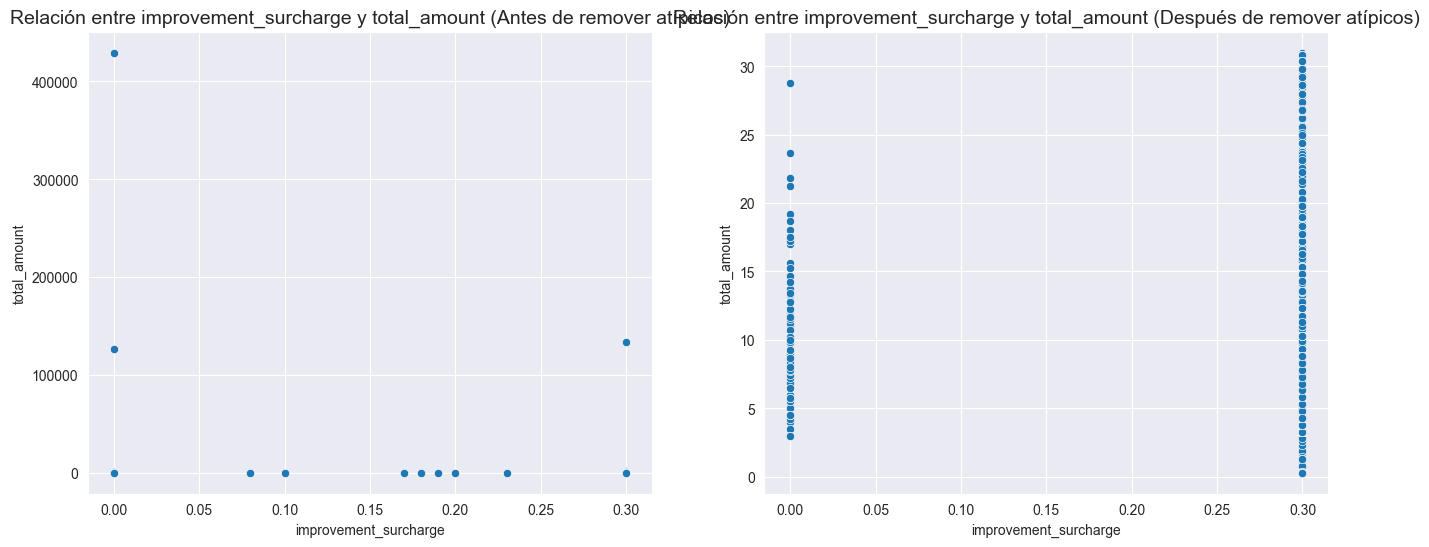

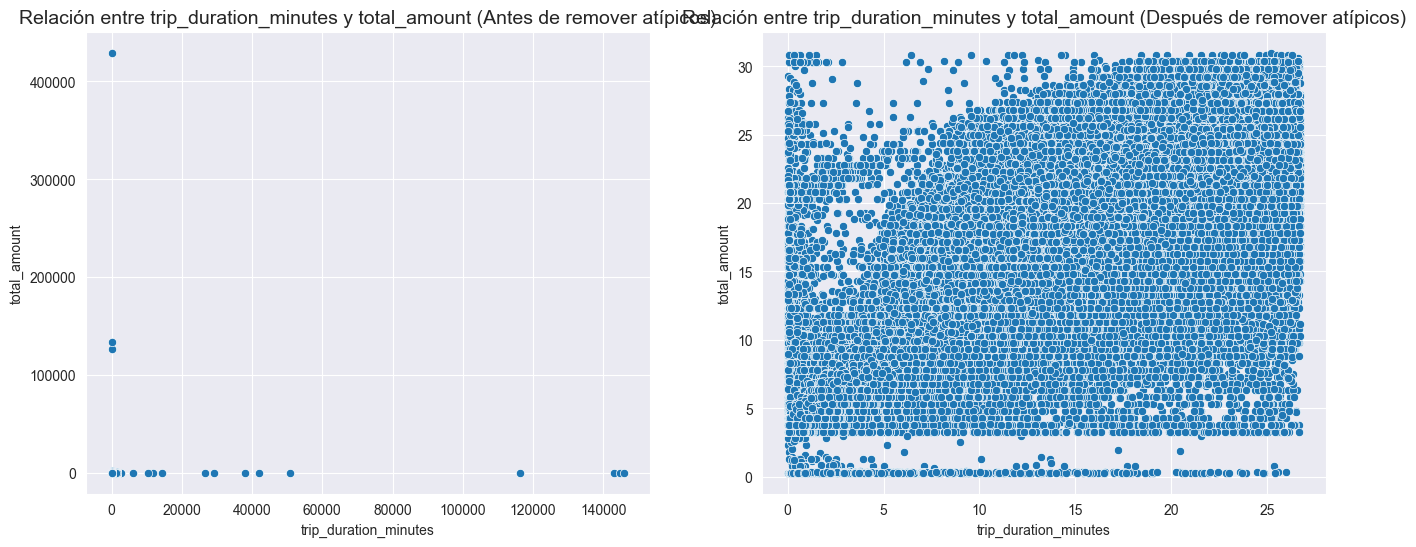

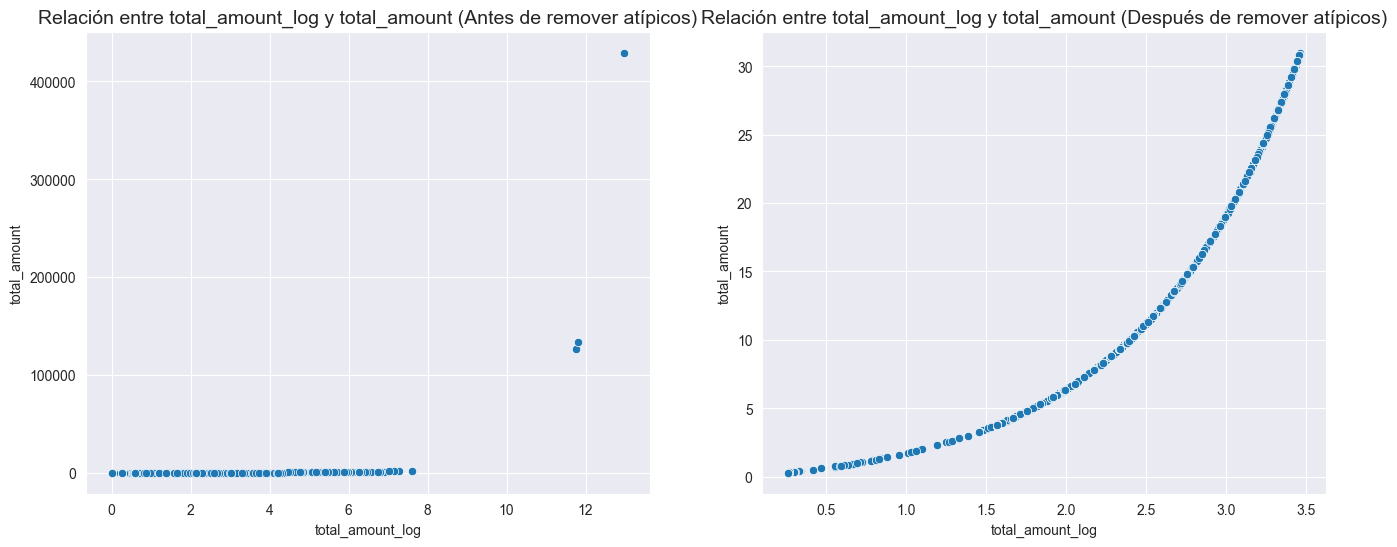

In [33]:
for col in vars_con:
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=data, x=col, y=target_var_num)
    plt.title(f'Relación entre {col} y {target_var_num} (Antes de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)

    plt.subplot(1, 2, 2)
    sns.scatterplot(data=data_cleaned, x=col, y=target_var_num)
    plt.title(f'Relación entre {col} y {target_var_num} (Después de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)
    plt.show()

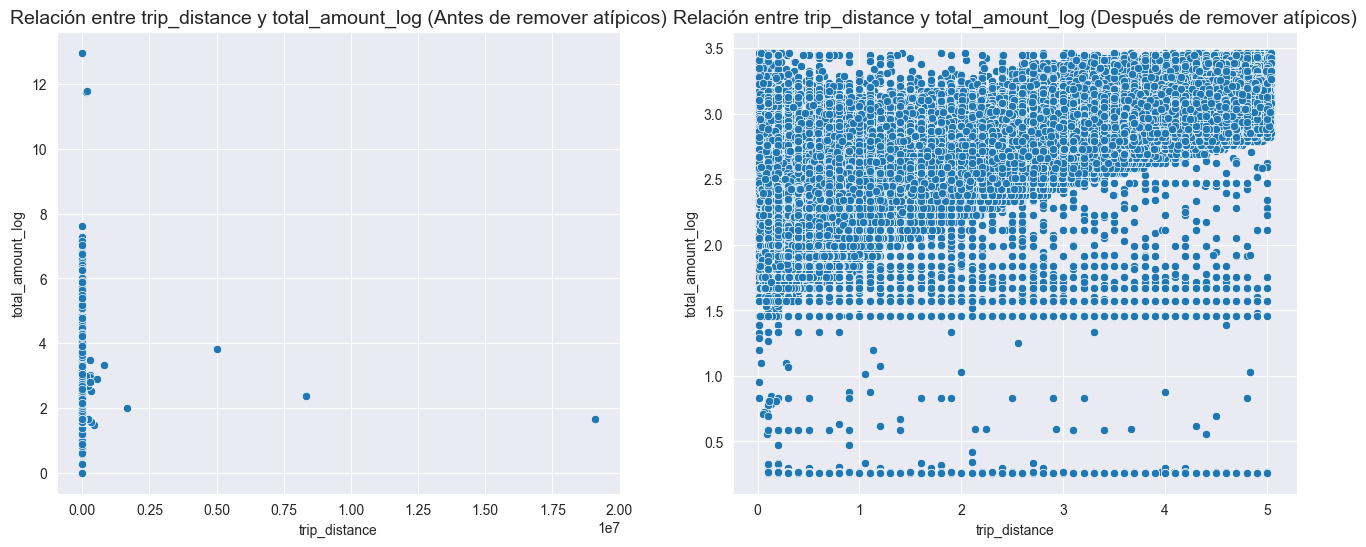

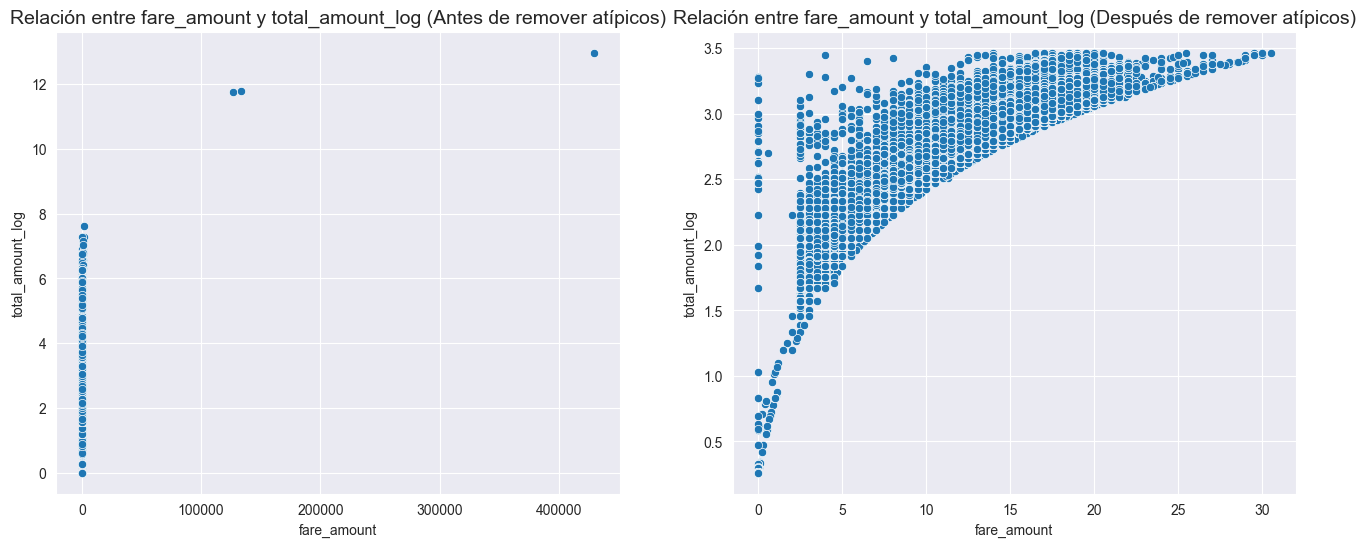

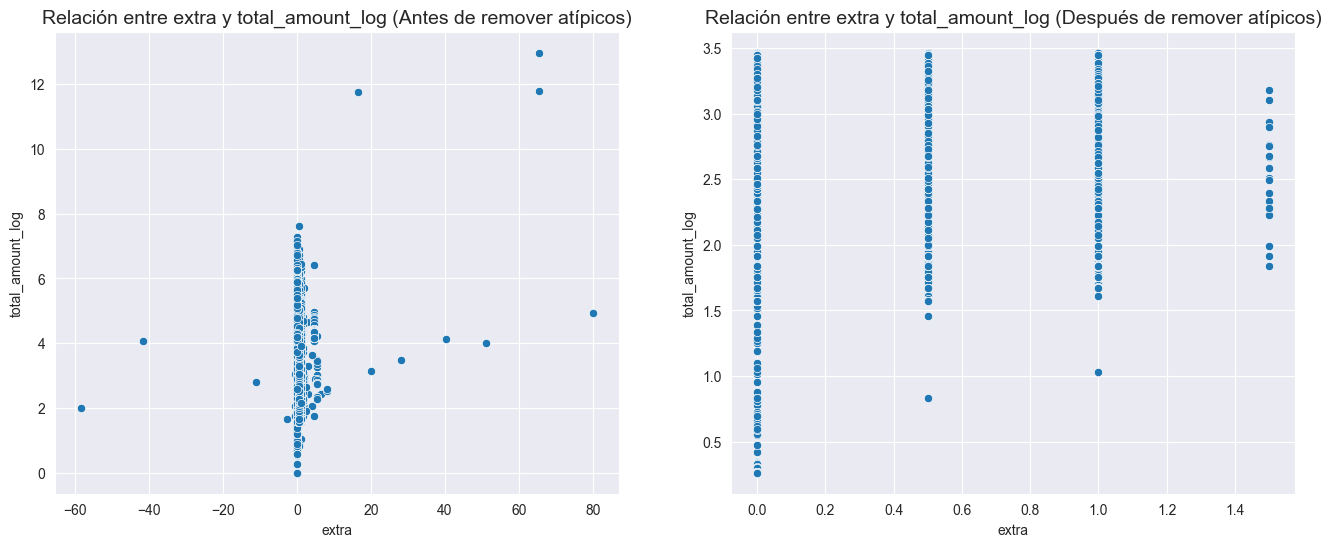

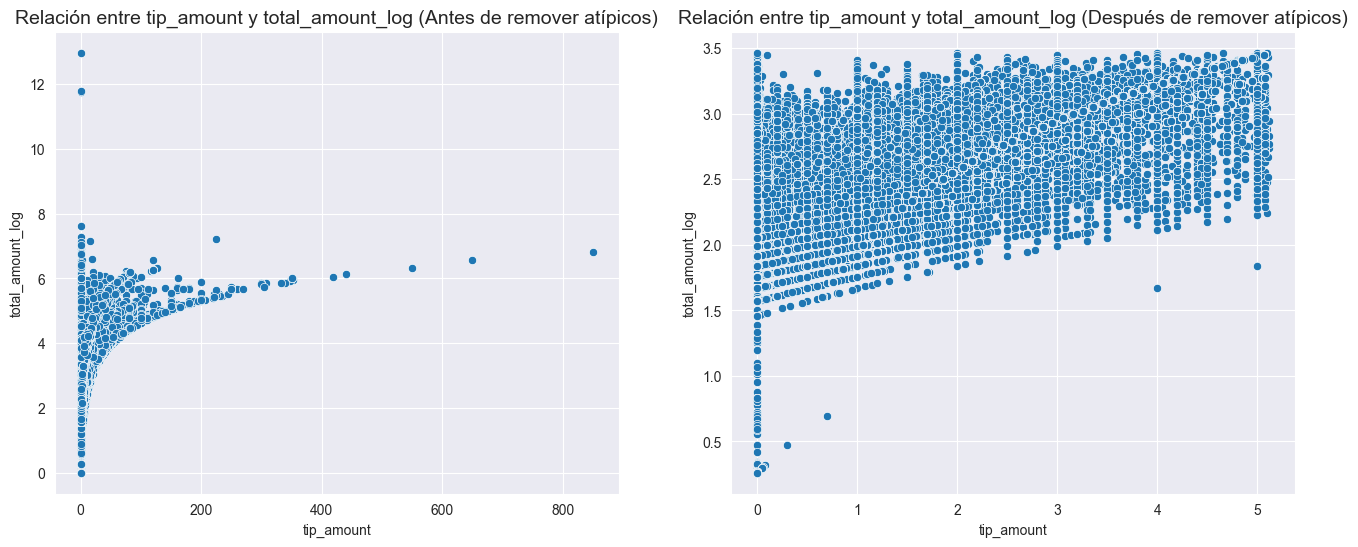

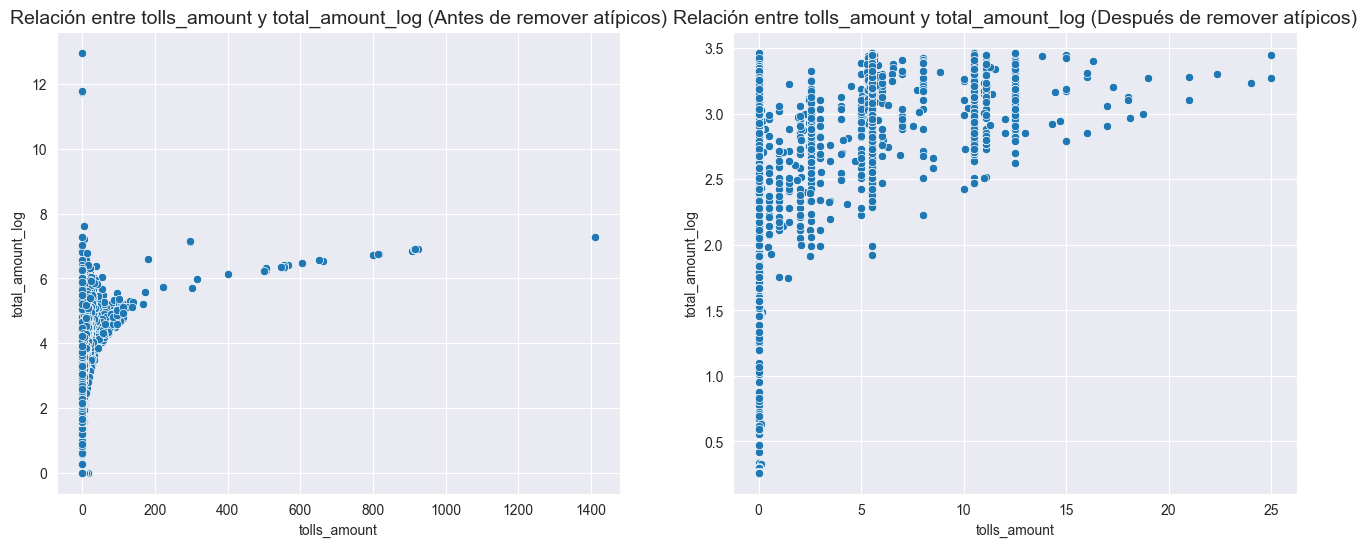

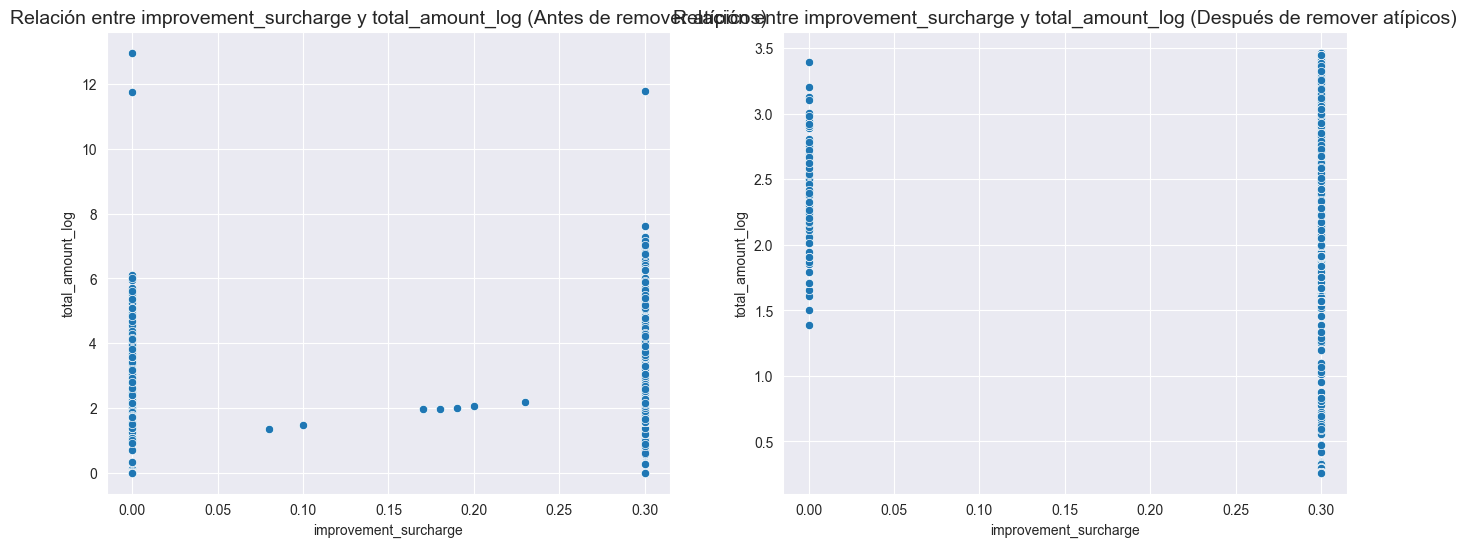

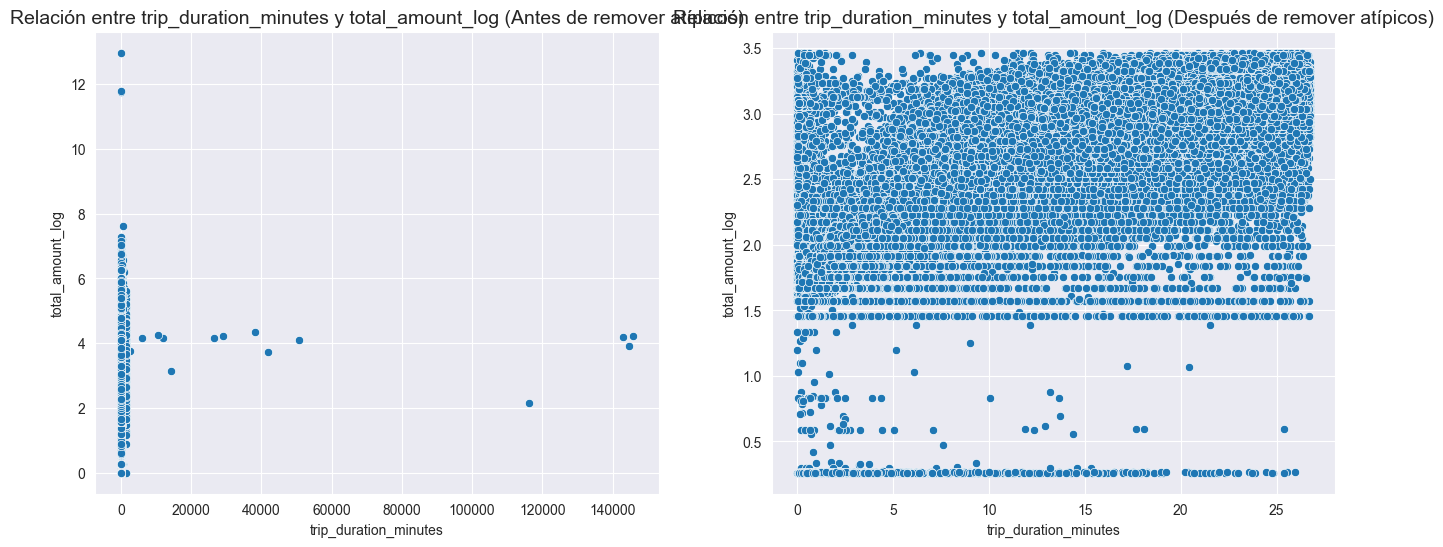

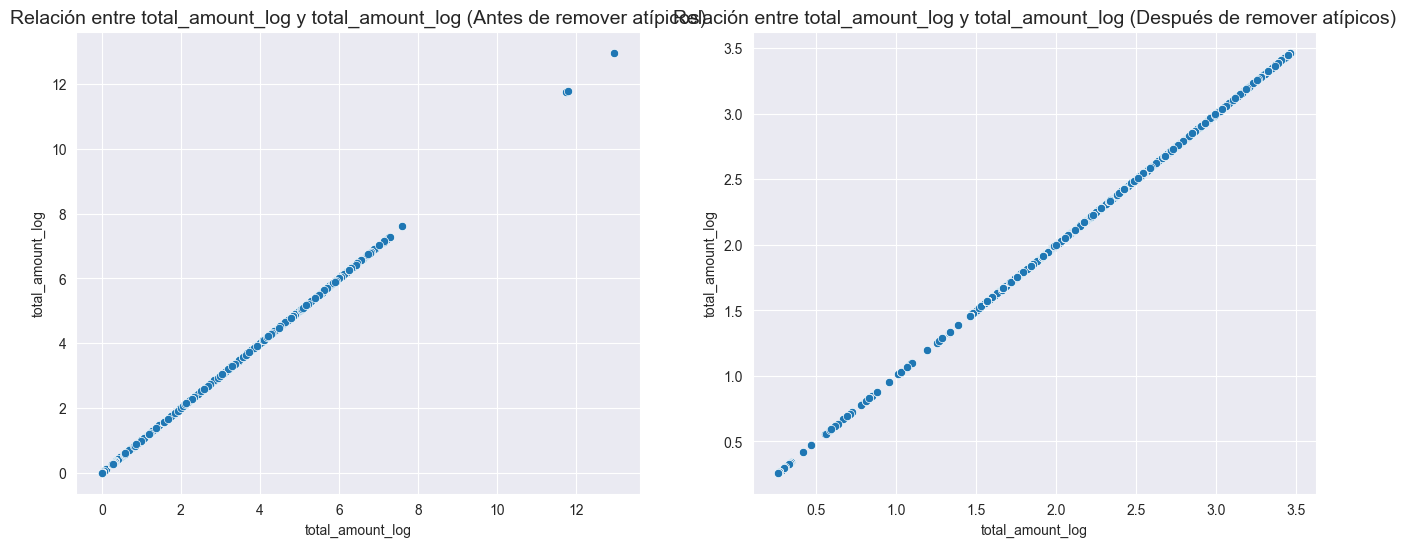

In [34]:
for col in vars_con:
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=data, x=col, y=target_var_num_log)
    plt.title(f'Relación entre {col} y {target_var_num_log} (Antes de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num_log)

    plt.subplot(1, 2, 2)
    sns.scatterplot(data=data_cleaned, x=col, y=target_var_num_log)
    plt.title(f'Relación entre {col} y {target_var_num_log} (Después de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num_log)
    plt.show()

## Paso 11: Análisis multivariado

### Paso 11.1: Análisis de Correlación

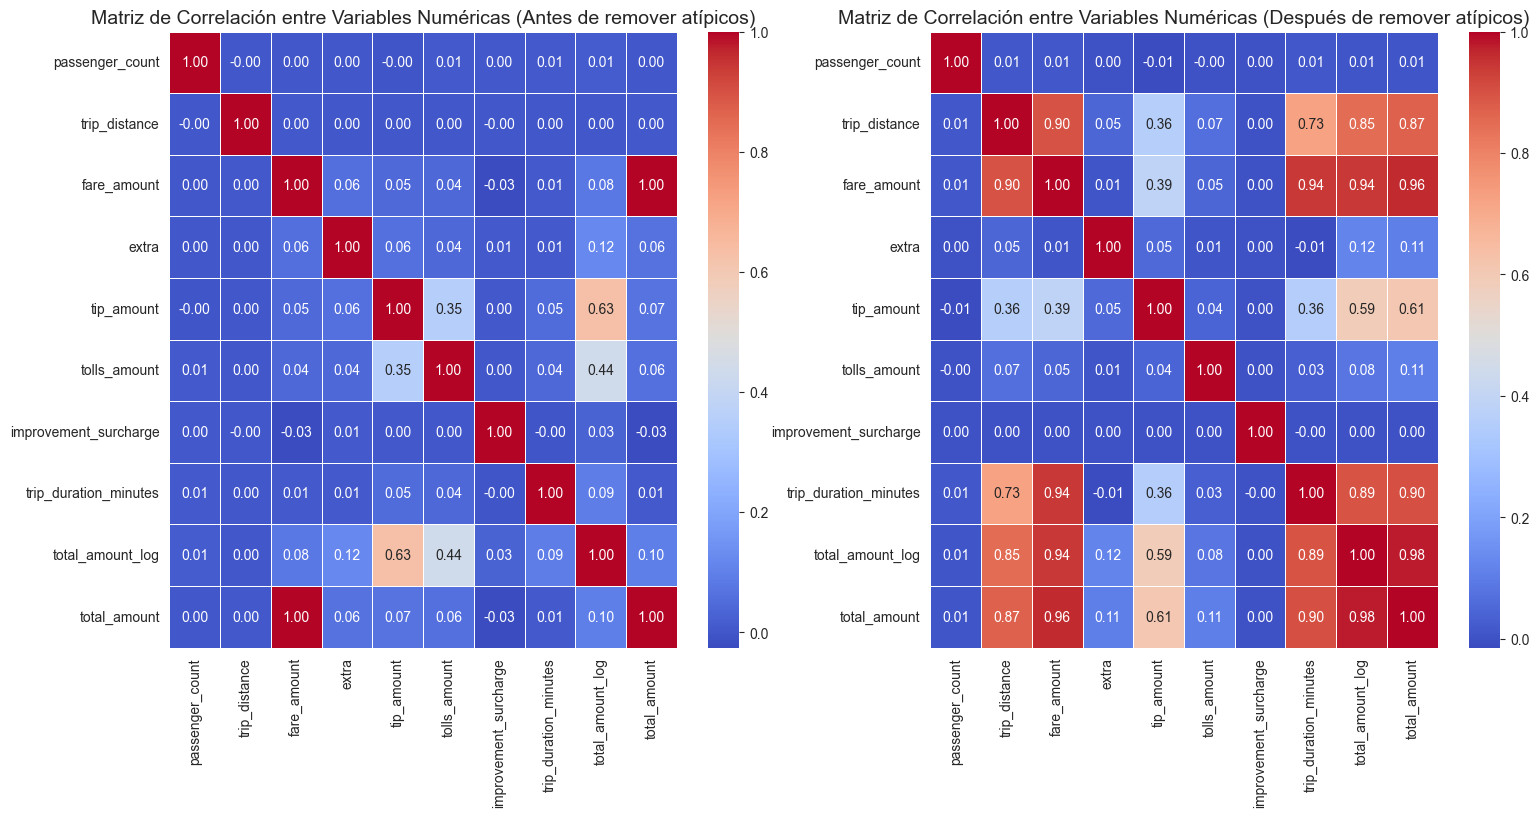

In [35]:
correlation_matrix = data[vars_nums + [target_var_num]].corr()
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas (Antes de remover atípicos)", fontsize=14)

correlation_matrix_cleaned = data_cleaned[vars_nums + [target_var_num]].corr()
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas (Después de remover atípicos)", fontsize=14)
plt.show()

## Paso 12: Pruebas de Hipótesis

## Paso 12: Modelamiento

### Paso 12.1: Preparación de los datos

In [114]:
data.head()

passenger_count  trip_distance  payment_type  fare_amount  extra  \
0                1           2.50             1          9.0    0.5   
1                1           2.90             1         11.0    0.5   
2                2          19.98             1         54.5    0.5   
3                3          10.78             1         31.5    0.0   
4                5          30.43             1         98.0    0.0   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        2.05          0.00                    0.3         12.35   
1        3.05          0.00                    0.3         15.35   
2        8.00          0.00                    0.3         63.80   
3        3.78          5.54                    0.3         41.62   
4        0.00         15.50                    0.3        113.80   

   trip_duration_minutes trip_distance_quantile trip_distance_interval  \
0               7.916667                   long                2-3 min   
1              11.100000                   long                2-3 min   
2              31.100000              very long        more than 5 min   
3              30.813333              very long        more than 5 min   
4              79.723333              very long        more than 5 min   

   total_amount_log trip_duration_minutes_interval  
0          2.591516                       5-10 min  
1          2.794228                      10-15 min  
2          4.171306               more than 25 min  
3          3.752324               more than 25 min  
4          4.743191               more than 25 min

In [115]:
data_cleaned.head()

passenger_count  trip_distance  payment_type  fare_amount  extra  \
0                1           2.50             1          9.0    0.5   
1                1           2.90             1         11.0    0.5   
2                1           0.70             1          5.5    0.5   
3                2           0.54             2          4.0    0.5   
4                1           1.70             2          8.0    0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        2.05           0.0                    0.3         12.35   
1        3.05           0.0                    0.3         15.35   
2        2.00           0.0                    0.3          8.80   
3        0.00           0.0                    0.3          5.30   
4        0.00           0.0                    0.3          9.30   

   trip_duration_minutes trip_distance_quantile trip_distance_interval  \
0               7.916667                   long                2-3 min   
1              11.100000              very long                2-3 min   
2               4.983333             very short        less than 1 min   
3               2.033333             very short        less than 1 min   
4               7.783333                 medium                1-2 min   

   total_amount_log trip_duration_minutes_interval  
0          2.591516                       5-10 min  
1          2.794228                      10-15 min  
2          2.282382                less than 5 min  
3          1.840550                less than 5 min  
4          2.332144                       5-10 min

In [116]:
data_encoded = data.copy()

In [117]:
data_cleaned_encoded = data_cleaned.copy()

In [118]:
data_encoded = pd.get_dummies(data_encoded, columns=vars_cat, drop_first=True)

In [119]:
data_cleaned_encoded = pd.get_dummies(data_cleaned_encoded, columns=vars_cat, drop_first=True)

In [120]:
data_encoded.head()

passenger_count  trip_distance  fare_amount  extra  tip_amount  \
0                1           2.50          9.0    0.5        2.05   
1                1           2.90         11.0    0.5        3.05   
2                2          19.98         54.5    0.5        8.00   
3                3          10.78         31.5    0.0        3.78   
4                5          30.43         98.0    0.0        0.00   

   tolls_amount  improvement_surcharge  total_amount  trip_duration_minutes  \
0          0.00                    0.3         12.35               7.916667   
1          0.00                    0.3         15.35              11.100000   
2          0.00                    0.3         63.80              31.100000   
3          5.54                    0.3         41.62              30.813333   
4         15.50                    0.3        113.80              79.723333   

   total_amount_log  ...  trip_distance_interval_2-3 min  \
0          2.591516  ...                            True   
1          2.794228  ...                            True   
2          4.171306  ...                           False   
3          3.752324  ...                           False   
4          4.743191  ...                           False   

   trip_distance_interval_3-4 min  trip_distance_interval_4-5 min  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   trip_distance_interval_less than 1 min  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   

   trip_distance_interval_more than 5 min  \
0                                   False   
1                                   False   
2                                    True   
3                                    True   
4                                    True   

   trip_duration_minutes_interval_15-20 min  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   trip_duration_minutes_interval_20-25 min  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   trip_duration_minutes_interval_5-10 min  \
0                                     True   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   trip_duration_minutes_interval_less than 5 min  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   trip_duration_minutes_interval_more than 25 min  
0                                            False  
1                                            False  
2                                             True  
3                                             True  
4                                             True  

[5 rows x 27 columns]

In [121]:
data_cleaned_encoded.head()

passenger_count  trip_distance  fare_amount  extra  tip_amount  \
0                1           2.50          9.0    0.5        2.05   
1                1           2.90         11.0    0.5        3.05   
2                1           0.70          5.5    0.5        2.00   
3                2           0.54          4.0    0.5        0.00   
4                1           1.70          8.0    0.5        0.00   

   tolls_amount  improvement_surcharge  total_amount  trip_duration_minutes  \
0           0.0                    0.3         12.35               7.916667   
1           0.0                    0.3         15.35              11.100000   
2           0.0                    0.3          8.80               4.983333   
3           0.0                    0.3          5.30               2.033333   
4           0.0                    0.3          9.30               7.783333   

   total_amount_log  ...  trip_distance_interval_2-3 min  \
0          2.591516  ...                            True   
1          2.794228  ...                            True   
2          2.282382  ...                           False   
3          1.840550  ...                           False   
4          2.332144  ...                           False   

   trip_distance_interval_3-4 min  trip_distance_interval_4-5 min  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   trip_distance_interval_less than 1 min  \
0                                   False   
1                                   False   
2                                    True   
3                                    True   
4                                   False   

   trip_distance_interval_more than 5 min  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   

   trip_duration_minutes_interval_15-20 min  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   trip_duration_minutes_interval_20-25 min  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   trip_duration_minutes_interval_5-10 min  \
0                                     True   
1                                    False   
2                                    False   
3                                    False   
4                                     True   

   trip_duration_minutes_interval_less than 5 min  \
0                                           False   
1                                           False   
2                                            True   
3                                            True   
4                                           False   

   trip_duration_minutes_interval_more than 25 min  
0                                            False  
1                                            False  
2                                            False  
3                                            False  
4                                            False  

[5 rows x 27 columns]

### Paso 12.2: Entrenamiento

In [122]:
X = data_encoded[["extra", "trip_distance"]]
y = data_encoded[target_var_num]

In [123]:
X_cleaned = data_cleaned_encoded[["extra", "trip_distance"]]
y_cleaned = data_cleaned_encoded[target_var_num]

In [124]:
data_cleaned_encoded.head()

passenger_count  trip_distance  fare_amount  extra  tip_amount  \
0                1           2.50          9.0    0.5        2.05   
1                1           2.90         11.0    0.5        3.05   
2                1           0.70          5.5    0.5        2.00   
3                2           0.54          4.0    0.5        0.00   
4                1           1.70          8.0    0.5        0.00   

   tolls_amount  improvement_surcharge  total_amount  trip_duration_minutes  \
0           0.0                    0.3         12.35               7.916667   
1           0.0                    0.3         15.35              11.100000   
2           0.0                    0.3          8.80               4.983333   
3           0.0                    0.3          5.30               2.033333   
4           0.0                    0.3          9.30               7.783333   

   total_amount_log  ...  trip_distance_interval_2-3 min  \
0          2.591516  ...                            True   
1          2.794228  ...                            True   
2          2.282382  ...                           False   
3          1.840550  ...                           False   
4          2.332144  ...                           False   

   trip_distance_interval_3-4 min  trip_distance_interval_4-5 min  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   trip_distance_interval_less than 1 min  \
0                                   False   
1                                   False   
2                                    True   
3                                    True   
4                                   False   

   trip_distance_interval_more than 5 min  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   

   trip_duration_minutes_interval_15-20 min  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   trip_duration_minutes_interval_20-25 min  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   trip_duration_minutes_interval_5-10 min  \
0                                     True   
1                                    False   
2                                    False   
3                                    False   
4                                     True   

   trip_duration_minutes_interval_less than 5 min  \
0                                           False   
1                                           False   
2                                            True   
3                                            True   
4                                           False   

   trip_duration_minutes_interval_more than 25 min  
0                                            False  
1                                            False  
2                                            False  
3                                            False  
4                                            False  

[5 rows x 27 columns]

In [125]:
X_cleaned_complete = data_cleaned_encoded.drop(columns=[target_var_num, "fare_amount"])  #[["extra", "tolls_amount", "tip_amount", "trip_distance", "trip_duration_minutes"]] #.drop(columns=["trip_distance_quantile", "trip_distance_interval", "fare_amount"])
y_cleaned_complete = data_cleaned_encoded[target_var_num]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [128]:
X_train_cleaned_complete, X_test_cleaned_complete, y_train_cleaned_complete, y_test_cleaned_complete = train_test_split(X_cleaned_complete, y_cleaned_complete, test_size=0.2, random_state=42)

In [129]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, title):
    # Entrenamiento
    model.fit(X_train, y_train)

    # Predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Cálculo de métricas
    metrics = {
        "MAE_Train": mean_absolute_error(y_train, y_pred_train),
        "RMSE_Train": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "R2_Train": r2_score(y_train, y_pred_train),
        "MAE_Test": mean_absolute_error(y_test, y_pred_test),
        "RMSE_Test": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "R2_Test": r2_score(y_test, y_pred_test)
    }

    return  y_pred_train, y_pred_test, title, metrics

In [130]:
models = {
    "Regresión Lineal Múltiple": LinearRegression(),
    "Lasso (alpha=0.1)": Lasso(alpha=0.1),
    "Ridge (alpha=1.0)": Ridge(alpha=1.0)
}

results = []

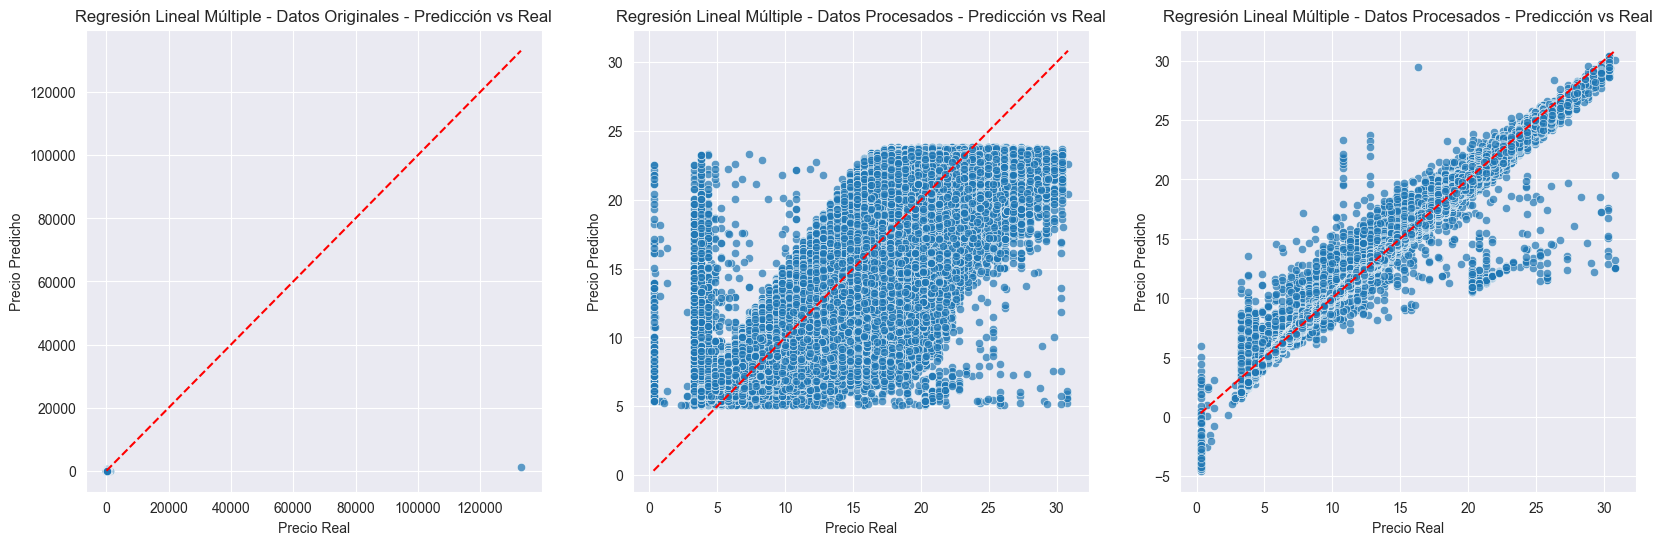

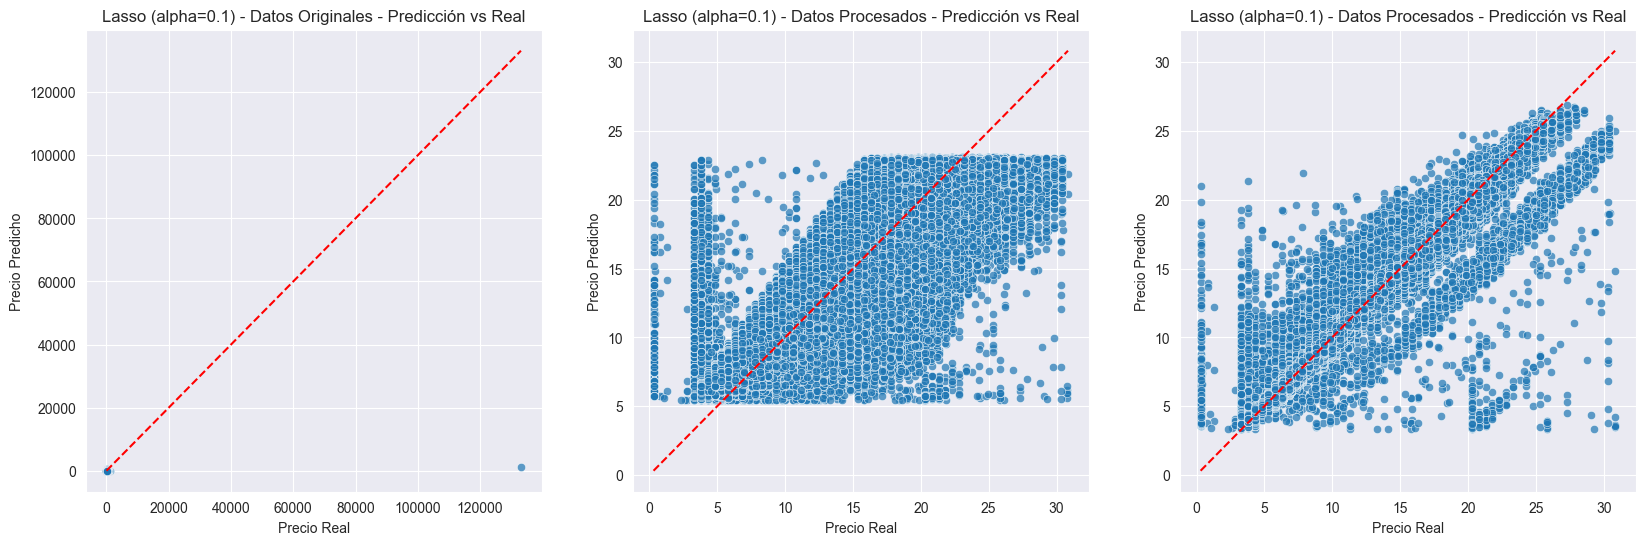

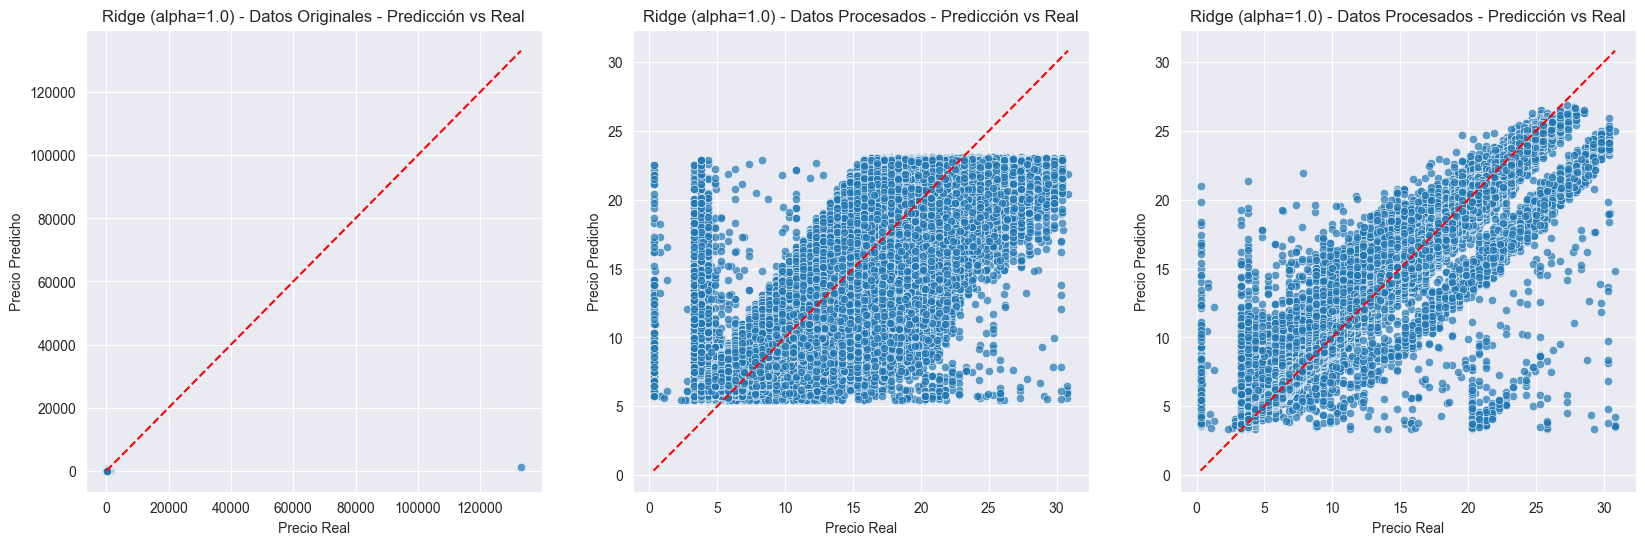

In [131]:
for name, model in models.items():
    y_train, y_pred_test, title, metrics1 = train_and_evaluate_model(model, X_train, X_test, y_train, y_test, f"{name} - Datos Originales")
    results.append({"Modelo": name + " - Original", **metrics1})
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.xlabel("Precio Real")
    plt.ylabel("Precio Predicho")
    plt.title(f"{title} - Predicción vs Real")

    y_train_cleaned, y_pred_test_cleaned, title_cleaned, metrics2_cleaned = train_and_evaluate_model(model, X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned, f"{name} - Datos Procesados")
    results.append({"Modelo": name + " - Procesado 3 Variables", **metrics2_cleaned})
    plt.subplot(1, 3, 2)
    sns.scatterplot(x=y_test_cleaned, y=y_pred_test_cleaned, alpha=0.7)
    plt.plot([y_test_cleaned.min(), y_test_cleaned.max()], [y_test_cleaned.min(), y_test_cleaned.max()], '--', color='red')
    plt.xlabel("Precio Real")
    plt.ylabel("Precio Predicho")
    plt.title(f"{title_cleaned} - Predicción vs Real")

    y_train_cleaned_complete, y_pred_test_cleaned_complete, title_cleaned_complete, metrics2_cleaned_complete = train_and_evaluate_model(model, X_train_cleaned_complete, X_test_cleaned_complete, y_train_cleaned_complete, y_test_cleaned_complete, f"{name} - Datos Procesados")
    results.append({"Modelo": name + " - Procesado Completo", **metrics2_cleaned_complete})
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=y_test_cleaned_complete, y=y_pred_test_cleaned_complete, alpha=0.7)
    plt.plot([y_test_cleaned_complete.min(), y_test_cleaned_complete.max()], [y_test_cleaned_complete.min(), y_test_cleaned_complete.max()], '--', color='red')
    plt.xlabel("Precio Real")
    plt.ylabel("Precio Predicho")
    plt.title(f"{title_cleaned_complete} - Predicción vs Real")
    plt.show()

### Paso 12.3: Prueba de Supuestos

### Paso 12.4: Evaluación

In [132]:
results_df = pd.DataFrame(results)
print(results_df)

                                              Modelo     MAE_Train  \
0               Regresión Lineal Múltiple - Original  9.668699e+00   
1  Regresión Lineal Múltiple - Procesado 3 Variables  1.570394e+00   
2     Regresión Lineal Múltiple - Procesado Completo  1.903322e-01   
3                       Lasso (alpha=0.1) - Original  1.675879e-01   
4          Lasso (alpha=0.1) - Procesado 3 Variables  2.432578e-01   
5             Lasso (alpha=0.1) - Procesado Completo  3.178843e-01   
6                       Ridge (alpha=1.0) - Original  3.024644e-06   
7          Ridge (alpha=1.0) - Procesado 3 Variables  3.296698e-07   
8             Ridge (alpha=1.0) - Procesado Completo  1.015993e-06   

     RMSE_Train  R2_Train  MAE_Test  RMSE_Test   R2_Test  
0  1.436825e+02  0.003296  9.664445  85.754271  0.011588  
1  2.074412e+00  0.766864  1.569980   2.074348  0.766494  
2  2.942822e-01  0.995308  0.190202   0.294232  0.995302  
3  2.192360e-01  0.999296  9.583111  85.757266  0.011519  
4  2